In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import hilbert, correlate
import time
import multiprocessing

In [2]:

# def fft(x):
#     N = len(x)
#     if N <= 1:
#         return x
#     even = fft(x[0::2])
#     odd = fft(x[1::2])
#     T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# def ifft(X):
#     N = len(X)
#     if N <= 1:
#         return X
#     even = ifft(X[0::2])
#     odd = ifft(X[1::2])
#     T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]

In [3]:

def generate_signals(freq, sample_rate, duration, phase_diff):
    noise_mag = 0.1
    t = np.arange(0, duration, 1/sample_rate)
    
    # signal1 = np.sin(2 * np.pi * freq * t + noise_mag*np.random.random(duration*sample_rate))
    # signal2 = np.sin(2 * np.pi * freq * t + noise_mag*np.random.random(duration*sample_rate) + phase_diff )
    signal1 = np.sin(2 * np.pi * freq * t )
    signal2 = np.sin(2 * np.pi * freq * t + phase_diff )
    
    return t, signal1, signal2

In [4]:
t = np.arange(0, 1, 1/sample_rate)
t.shape

NameError: name 'sample_rate' is not defined

In [5]:

def cross_correlation_method(signal1, signal2, sample_rate, freq):
    start_time = time.time()
    
    corr = correlate(signal1, signal2)
    lag = np.argmax(corr) - len(signal1) + 1
    phase_diff = (lag / sample_rate) * freq * 2* np.pi
    
    runtime = time.time() - start_time
    return phase_diff, runtime

In [6]:

def fft_method(signal1, signal2, sample_rate, freq):
    start_time = time.time()
    
    N = len(signal1)
    fft1 = fft(signal1)
    fft2 = fft(signal2)
    
    # Find the dominant frequency's phase
    phase1 = np.angle(fft1[np.argmax(np.abs(fft1))])
    phase2 = np.angle(fft2[np.argmax(np.abs(fft2))])
    
    phase_diff = phase1 - phase2
    
    runtime = time.time() - start_time
    return -phase_diff, runtime


In [7]:
def hilbert_method(signal1, signal2):
    start_time = time.time()
    
    analytic_signal1 = hilbert(signal1)
    analytic_signal2 = hilbert(signal2)
    
    phase1 = np.unwrap(np.angle(analytic_signal1))
    phase2 = np.unwrap(np.angle(analytic_signal2))
    
    phase_diff = np.mean(phase1 - phase2)
    
    runtime = time.time() - start_time
    return -phase_diff, runtime


def hilbert_method_2(signal1, signal2, sample_rate, freq):
    start_time = time.time()
    
    analytic_signal1 = hilbert_transform(signal1)
    analytic_signal2 = hilbert_transform(signal2)
    
    phase1 = np.unwrap(np.angle(analytic_signal1))
    phase2 = np.unwrap(np.angle(analytic_signal2))
    
    phase_diff = np.mean(phase1 - phase2)
    
    runtime = time.time() - start_time
    return -phase_diff, runtime

In [8]:
fft1

NameError: name 'fft1' is not defined

In [9]:
np.abs(fft1)

NameError: name 'fft1' is not defined

In [10]:
np.argmax(np.abs(fft1))

NameError: name 'fft1' is not defined

In [11]:
    
N = len(signal1)
fft1 = fft(signal1)
fft2 = fft(signal2)

# Find the dominant frequency's phase
phase1 = np.angle(fft1[np.argmax(np.abs(fft1))])
phase2 = np.angle(fft2[np.argmax(np.abs(fft2))])

phase_diff = phase1 - phase2

print(-phase_diff)

NameError: name 'signal1' is not defined

In [12]:
methods_l = [
    cross_correlation_method,
    fft_method,
    hilbert_method,hilbert_method_2]

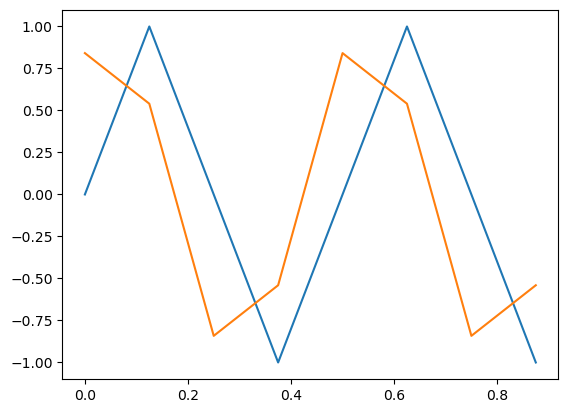

In [13]:
freq = 10     # Frequency of the signals (Hz)
sample_rate = 8  # Sampling rate (samples per second)
duration = 1   # Duration of the signals (seconds)
true_phase_diff = 1  # True phase difference in rad

# Generate signals
t, signal1, signal2 = generate_signals(freq, sample_rate, duration, true_phase_diff)
plt.plot(t,signal1)
plt.plot(t,signal2)

In [14]:
sample_rate/(2*np.pi*freq)

0.12732395447351627

In [15]:
phase_diff, runtime = hilbert_method(signal1, signal2, sample_rate, freq)
phase_diff
plt.plot(t,signal1)
plt.show()
plt.plot(t,signal2)
# plt.show()
# plt.plot(t,np.roll(signal2,int(true_phase_diff*sample_rate/(2*np.pi*freq))))

TypeError: hilbert_method() takes 2 positional arguments but 4 were given

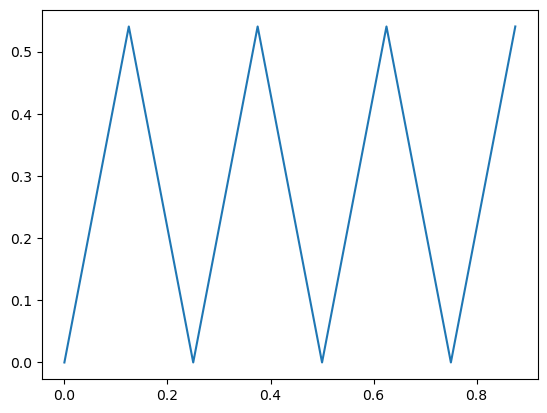

In [16]:
plt.plot(t,signal1*signal2)

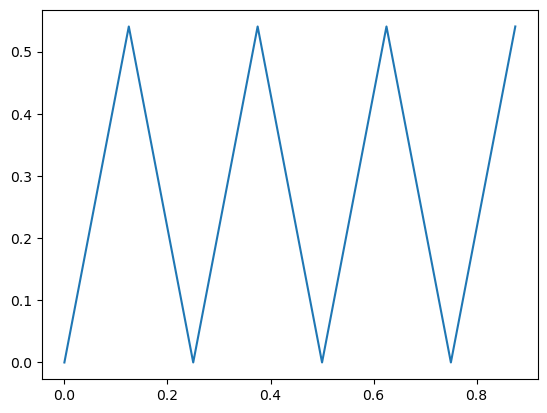

In [17]:
plt.plot(t,signal1*np.roll(signal2,int(sample_rate/(2*np.pi*freq))))

In [18]:
np.dot(signal1,np.roll(signal2,int(sample_rate/(2*np.pi*freq))))

2.161209223472558

In [19]:
methods = {
    "Cross-Correlation": cross_correlation_method,
    "FFT": fft_method,
    "Hilbert": hilbert_method
    # "Hilbert2": hilbert_method_2
}

In [20]:
# Parameters
freq = 10      # Frequency of the signals (Hz)
sample_rate = 8  # Sampling rate (samples per second)
duration = 2   # Duration of the signals (seconds)
true_phase_diff = 1  # True phase difference in rad

# Generate signals
t, signal1, signal2 = generate_signals(freq, sample_rate, duration, true_phase_diff)

# Calculate phase difference using different methods


results = {}
for method_name, method in methods.items():
        phase_diff, runtime = method(signal1, signal2, sample_rate, freq)
        error = np.abs(true_phase_diff - phase_diff)
        results[method_name] = {"Phase Difference (deg)": phase_diff, "Error (deg)": error, "Runtime (s)": runtime}

# Display results
for method_name, result in results.items():
    print(f"{method_name} Method:")
    for key, value in result.items():
        print(f"  {key}: {value:.4f}")
    print()

# Plot the signals (optional)
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='Signal 1')
plt.plot(t, signal2, label='Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Generated Signals')
plt.show()


TypeError: hilbert_method() takes 2 positional arguments but 4 were given

In [21]:
generate_signals(1, 1024, 1, true_phase_diff)[2].shape

(1024,)

In [22]:
def compare(freq=10, sample_rate = 1024 ,duration = 1   ,true_phase_diff = 1 ,iterations=100):
    runtimes = np.zeros(4)
    errors = np.zeros(4)
    for j in range(iterations):



        t, signal1, signal2 = generate_signals(freq, sample_rate, duration, true_phase_diff)

        results = {}
        for i in range(4):
            method = methods_l[i]
            phase_diff, runtime = method(signal1, signal2, sample_rate, freq)
            error = np.abs(true_phase_diff - phase_diff)/true_phase_diff
            runtimes[i] += runtime
            errors[i] = error

    return errors/iterations, runtimes/iterations

            
            




In [23]:
compare()

TypeError: hilbert_method() takes 2 positional arguments but 4 were given

In [24]:
freqs = np.array([10**i for i in range(-10,10)])
phase_diffs = np.arange(100)/100 * 2 *np.pi

vs_freqs_data_times=  np.zeros((freqs.shape[0],3))
vs_freqs_data_errors=   np.zeros((freqs.shape[0],3))

In [25]:
for i in range(freqs.shape[0]):
    print(i)
    vs_freqs_data_errors[i] , vs_freqs_data_times[i] = compare(freq=freqs[i])

0


TypeError: hilbert_method() takes 2 positional arguments but 4 were given

In [26]:
vs_freqs_data_times.shape

(20, 3)

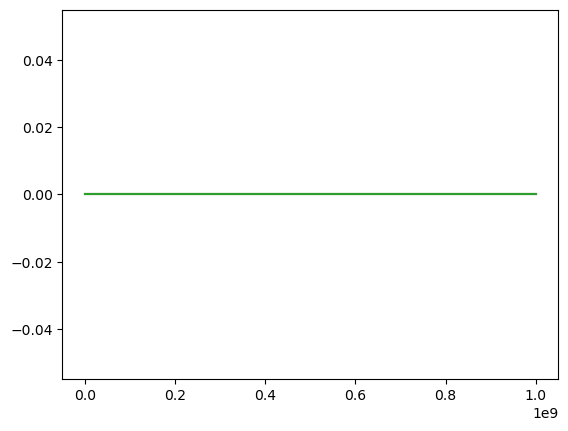

In [27]:
plt.plot(freqs,vs_freqs_data_times[:,0])
plt.plot(freqs,vs_freqs_data_times[:,1])
plt.plot(freqs,vs_freqs_data_times[:,2])

In [196]:
vs_freqs_data_errors

array([[1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997070e-03],
       [8.89553383e-03, 1.00000000e-02, 9.99997179e-03],
       [6.12037578e-04, 1.11022302e-18, 0.00000000e+00],
       [1.82522958e-04, 1.11022302e-18, 4.44089210e-18],
       [6.36310778e-02, 3.14159265e-02, 1.77635684e-17],
       [4.39514621e-01, 3.14159265e-02, 2.00000000e-02],
       [3.07796158e+00, 1.75415238e-16, 2.00000000e-02],
       [9.20488473e+01, 2.00000000e-02, 2.00000000e-02],
       [3.06806158e+02, 2.00000000e-02, 2.00000000e-02],
       [3.06795158e+03, 2.00000

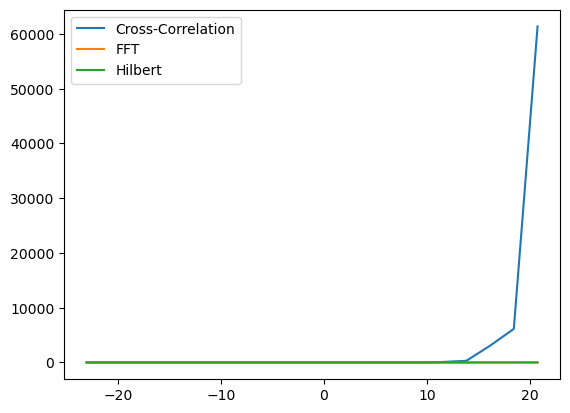

In [191]:
plt.plot(np.log(freqs),vs_freqs_data_errors[:,0])
plt.plot(np.log(freqs),vs_freqs_data_errors[:,1])
plt.plot(np.log(freqs),vs_freqs_data_errors[:,2])
plt.legend(   [ "Cross-Correlation","FFT","Hilbert"])

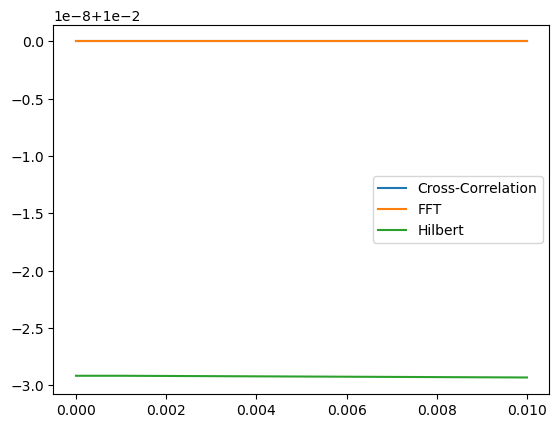

In [193]:
ind =9
plt.plot(freqs[:ind],vs_freqs_data_errors[:ind,0])
plt.plot(freqs[:ind],vs_freqs_data_errors[:ind,1])
plt.plot(freqs[:ind],vs_freqs_data_errors[:ind,2])
plt.legend(   [ "Cross-Correlation","FFT","Hilbert"])

In [28]:

def hilbert_method_2(signal1, signal2):
    start_time = time.time()

    def hilbert_transform(signal):
        n = len(signal)
        # Compute the FFT of the signal
        fft_signal = np.fft.fft(signal)
        
        # Create a frequency multiplier
        h = np.zeros(n)
        if n % 2 == 0:
            h[0] = h[n//2] = 1
            h[1:n//2] = 2
        else:
            h[0] = 1
            h[1:(n//2)+1] = 2
        
        # Apply the multiplier to the FFT signal
        fft_signal = fft_signal * h
        
        # Compute the inverse FFT to get the analytic signal
        analytic_signal = np.fft.ifft(fft_signal)
        
        return analytic_signal

    # Compute the analytic signals
    analytic_signal1 = hilbert_transform(signal1)
    analytic_signal2 = hilbert_transform(signal2)
    
    # Compute the instantaneous phase
    phase1 = np.angle(analytic_signal1)
    phase2 = np.angle(analytic_signal2)
    
    # Compute the phase difference
    phase_diff = np.mean(np.unwrap(phase1 - phase2))

    runtime = time.time() - start_time
    return -phase_diff, runtime

In [29]:

def fft_method_2(signal1, signal2, sample_rate):
    start_time = time.time()

    # Implement FFT from scratch
    def fft(signal):
        n = len(signal)
        if n <= 1:
            return signal
        even = fft(signal[0::2])
        odd = fft(signal[1::2])
        t = [np.exp(-2j * np.pi * k / n) * odd[k] for k in range(n // 2)]
        return [even[k] + t[k] for k in range(n // 2)] + [even[k] - t[k] for k in range(n // 2)]

    # Apply FFT to both signals
    fft1 = fft(signal1)
    fft2 = fft(signal2)

    # Convert FFT results to amplitudes and phases
    fft1_magnitude = np.abs(fft1)
    fft2_magnitude = np.abs(fft2)
    
    # Find the index of the dominant frequency
    dominant_index1 = np.argmax(fft1_magnitude)
    dominant_index2 = np.argmax(fft2_magnitude)
    
    # Calculate the phase difference at the dominant frequency
    phase1 = np.angle(fft1[dominant_index1])
    phase2 = np.angle(fft2[dominant_index2])
    
    phase_diff = phase1 - phase2

    runtime = time.time() - start_time
    return -phase_diff, runtime


In [30]:

def cross_correlation_method_2(signal1, signal2, sample_rate, freq):
    start_time = time.time()
    
    # Ensure the signals are of the same length
    n = len(signal1)
    
    # Compute the cross-correlation
    correlation = np.zeros(2*n - 1)
    for lag in range(-n + 1, n):
        if lag < 0:
            correlation[lag + n - 1] = np.sum(signal1[:lag] * signal2[-lag:])
        else:
            correlation[lag + n - 1] = np.sum(signal1[lag:] * signal2[:n - lag])
    
    # Find the index of the maximum correlation
    max_corr_index = np.argmax(correlation)
    
    # Calculate the lag
    lag = max_corr_index - (n - 1)
    
    # Calculate the phase difference
    phase_diff = (lag / sample_rate) * freq * 2*np.pi
    
    runtime = time.time() - start_time
    return phase_diff, runtime

In [31]:
hilbert_method_2(signal1,signal2)

(1.0000000000000013, 0.0011134147644042969)

In [32]:
%%timeit
hilbert_method_2(signal1,signal2)

KeyboardInterrupt: 

In [ ]:
%%timeit
cross_correlation_method_2(signal1,signal2,sample_rate,freq)

19.4 ms ± 424 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
fft_method_2(signal1,signal2,sample_rate)

IndexError: list index out of range

In [ ]:
signal1.shape

(2000,)

In [ ]:
import socket
import numpy as np
import time
import multiprocessing

def generate_sine_wave(frequency, sampling_rate, duration):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    return np.sin(2 * np.pi * frequency * t)

def stream_signal(signal, port):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as server_socket:
        server_socket.bind(('localhost', port))
        server_socket.listen(1)
        conn, addr = server_socket.accept()
        with conn:
            print(f"Connected by {addr}")
            for value in signal:
                conn.sendall(value.tobytes())

def start_server():
    sampling_rate = 1024  # Samples per second
    duration = 1  # Duration in seconds

    sine_wave_1 = generate_sine_wave(frequency=5, sampling_rate=sampling_rate, duration=duration)
    sine_wave_2 = generate_sine_wave(frequency=10, sampling_rate=sampling_rate, duration=duration)

    thread1 = multiprocessing.Process(target=stream_signal, args=(sine_wave_1, 65432))
    thread2 = multiprocessing.Process(target=stream_signal, args=(sine_wave_2, 65433))

    thread1.start()
    thread2.start()

    time.sleep(1)

    thread1.kill()
    thread2.kill()


if __name__ == "__main__":
    start_server()


In [11]:
%%timeit 
generate_sine_wave(5,1024,1)

23.1 µs ± 421 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
import socket
import numpy as np

def receive_signal(port):
    signal = []
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as client_socket:
        client_socket.connect(('localhost', port))
        while True:
            data = client_socket.recv(4)  # Assuming float32 format, 4 bytes
            if not data:
                break
            value = np.frombuffer(data, dtype=np.float32)
            signal.append(value[0])
    return np.array(signal)

def start_client():
    while True:

        signal_1 = receive_signal(65432)
        signal_2 = receive_signal(65433)

        # Do something with the received signals
        print(f"Received Signal 1: {signal_1[:10]}")
        print(f"Received Signal 2: {signal_2[:10]}")

if __name__ == "__main__":
    start_client()


ConnectionRefusedError: [Errno 111] Connection refused

In [5]:
%%timeit 
np.zeros(1024)

335 ns ± 8.12 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [7]:
%%timeit 
np.save("testArray",np.zeros(1024))

101 µs ± 6.45 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [33]:
def fft_imp(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft_imp(x[0::2])
    odd = fft_imp(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def ifft_imp(X):
    N = len(X)
    if N <= 1:
        return X
    even = ifft_imp(X[0::2])
    odd = ifft_imp(X[1::2])
    T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]

/home/alireza-astane/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


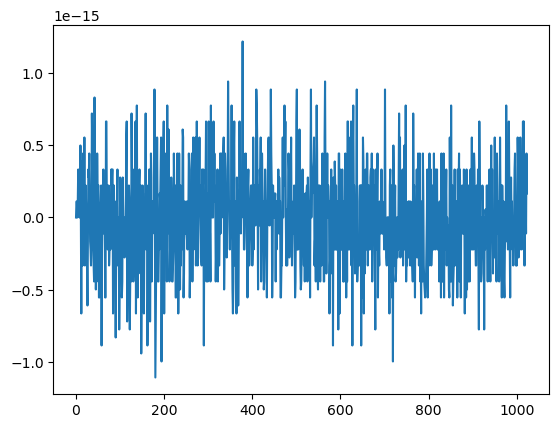

In [37]:
signal = np.sin(1000 * np.arange(1024))
# plt.plot(np.arange(1024),fft(signal) - np.array(fft_imp(signal)))
plt.plot(np.arange(1024),hilbert(signal) - hilbert_transform(signal))

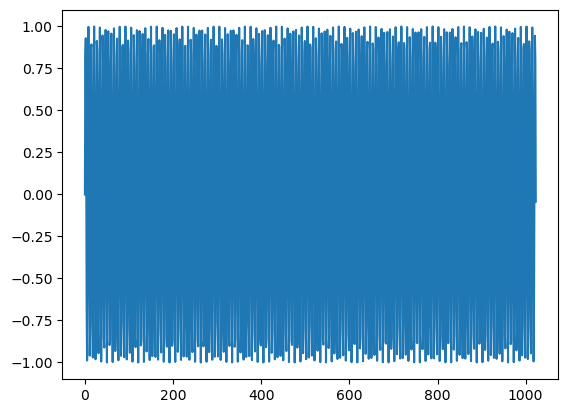

In [35]:
plt.plot(np.arange(1024),signal)

In [36]:
def hilbert_transform(signal):
    # Compute the FFT of the input signal
    N = len(signal)
    X = fft_imp(signal)

    # Create the filter: 1 for positive frequencies, 0 for negative frequencies
    H = np.zeros(N)
    if N % 2 == 0:
        H[0] = 1
        H[1:N//2] = 2
        H[N//2] = 1
    else:
        H[0] = 1
        H[1:(N+1)//2] = 2
    
    # Apply the filter to the FFT of the signal
    X_filtered = X * H

    # Compute the inverse FFT to get the analytic signal
    analytic_signal = ifft_imp(X_filtered)

    return analytic_signal

In [32]:
hilbert

<function scipy.signal._signaltools.hilbert(x, N=None, axis=-1)>

In [38]:
signal1 = np.array ([0.000000 ,-0.544021 ,0.912945 ,-0.988032 ,0.745113 ,-0.262375 ,-0.304811 ,0.773891 ,-0.993889 ,0.893997 ,-0.506366 ,-0.044243 ,0.580611 ,-0.930106 ,0.980240 ,-0.714876 ,0.219425 ,0.346649 ,-0.801153 ,0.997799 ,-0.873297 ,0.467719 ,0.088399 ,-0.616064 ,0.945445 ,-0.970528 ,0.683240 ,-0.176046 ,-0.387809 ,0.826846 ,-0.999756 ,0.850888 ,-0.428155 ,-0.132382 ,0.650311 ,-0.958933 ,0.958916 ,-0.650265 ,0.132322 ,0.428210 ,-0.850919 ,0.999755 ,-0.826812 ,0.387754 ,0.176105 ,-0.683284 ,0.970543 ,-0.945426 ,0.616017 ,-0.088339 ,-0.467772 ,0.873327 ,-0.997795 ,0.801117 ,-0.346593 ,-0.219484 ,0.714919 ,-0.980252 ,0.930084 ,-0.580562 ,0.044182 ,0.506418 ,-0.894024 ,0.993882 ,-0.773852 ,0.304753 ,0.262433 ,-0.745153 ,0.988041 ,-0.912921 ,0.543971 ,0.000060 ,-0.544072 ,0.912970 ,-0.988022 ,0.745073 ,-0.262317 ,-0.304868 ,0.773929 ,-0.993895 ,0.893970 ,-0.506314 ,-0.044303 ,0.580660 ,-0.930128 ,0.980228 ,-0.714834 ,0.219366 ,0.346706 ,-0.801189 ,0.997803 ,-0.873268 ,0.467665 ,0.088459 ,-0.616112 ,0.945465 ,-0.970513 ,0.683196 ,-0.175987 ,-0.387865 ,0.826880 ,-0.999757 ,0.850856 ,-0.428101 ,-0.132441 ,0.650357 ,-0.958950 ,0.958899 ,-0.650219 ,0.132262 ,0.428264 ,-0.850951 ,0.999753 ,-0.826778 ,0.387698 ,0.176165 ,-0.683328 ,0.970557 ,-0.945406 ,0.615969 ,-0.088279 ,-0.467825 ,0.873356 ,-0.997791 ,0.801080 ,-0.346536 ,-0.219543 ,0.714961 ,-0.980264 ,0.930062 ,-0.580513 ,0.044122 ,0.506470 ,-0.894051 ,0.993875 ,-0.773814 ,0.304696 ,0.262491 ,-0.745194 ,0.988050 ,-0.912896 ,0.543920 ,0.000121 ,-0.544122 ,0.912994 ,-0.988013 ,0.745033 ,-0.262258 ,-0.304925 ,0.773967 ,-0.993902 ,0.893943 ,-0.506262 ,-0.044363 ,0.580709 ,-0.930150 ,0.980216 ,-0.714792 ,0.219308 ,0.346763 ,-0.801225 ,0.997807 ,-0.873239 ,0.467612 ,0.088519 ,-0.616159 ,0.945484 ,-0.970499 ,0.683152 ,-0.175927 ,-0.387921 ,0.826913 ,-0.999758 ,0.850824 ,-0.428046 ,-0.132501 ,0.650402 ,-0.958967 ,0.958882 ,-0.650173 ,0.132202 ,0.428319 ,-0.850983 ,0.999752 ,-0.826744 ,0.387643 ,0.176224 ,-0.683372 ,0.970572 ,-0.945386 ,0.615922 ,-0.088219 ,-0.467878 ,0.873385 ,-0.997787 ,0.801044 ,-0.346480 ,-0.219602 ,0.715003 ,-0.980275 ,0.930040 ,-0.580464 ,0.044062 ,0.506522 ,-0.894078 ,0.993869 ,-0.773776 ,0.304638 ,0.262549 ,-0.745234 ,0.988060 ,-0.912871 ,0.543869 ,0.000181 ,-0.544173 ,0.913019 ,-0.988004 ,0.744993 ,-0.262200 ,-0.304983 ,0.774005 ,-0.993909 ,0.893916 ,-0.506210 ,-0.044423 ,0.580758 ,-0.930172 ,0.980204 ,-0.714750 ,0.219249 ,0.346819 ,-0.801261 ,0.997811 ,-0.873209 ,0.467559 ,0.088579 ,-0.616207 ,0.945504 ,-0.970484 ,0.683108 ,-0.175868 ,-0.387976 ,0.826947 ,-0.999760 ,0.850793 ,-0.427992 ,-0.132561 ,0.650448 ,-0.958984 ,0.958864 ,-0.650128 ,0.132143 ,0.428373 ,-0.851014 ,0.999750 ,-0.826710 ,0.387587 ,0.176283 ,-0.683416 ,0.970586 ,-0.945367 ,0.615874 ,-0.088158 ,-0.467932 ,0.873415 ,-0.997783 ,0.801008 ,-0.346423 ,-0.219661 ,0.715045 ,-0.980287 ,0.930017 ,-0.580415 ,0.044002 ,0.506574 ,-0.894105 ,0.993862 ,-0.773738 ,0.304581 ,0.262608 ,-0.745274 ,0.988069 ,-0.912847 ,0.543819 ,0.000241 ,-0.544223 ,0.913044 ,-0.987994 ,0.744952 ,-0.262142 ,-0.305040 ,0.774043 ,-0.993915 ,0.893889 ,-0.506158 ,-0.044484 ,0.580808 ,-0.930194 ,0.980192 ,-0.714708 ,0.219190 ,0.346876 ,-0.801297 ,0.997815 ,-0.873180 ,0.467505 ,0.088639 ,-0.616254 ,0.945524 ,-0.970470 ,0.683064 ,-0.175809 ,-0.388032 ,0.826981 ,-0.999761 ,0.850761 ,-0.427937 ,-0.132621 ,0.650494 ,-0.959001 ,0.958847 ,-0.650082 ,0.132083 ,0.428428 ,-0.851046 ,0.999749 ,-0.826676 ,0.387532 ,0.176343 ,-0.683460 ,0.970601 ,-0.945347 ,0.615827 ,-0.088098 ,-0.467985 ,0.873444 ,-0.997779 ,0.800972 ,-0.346367 ,-0.219719 ,0.715087 ,-0.980299 ,0.929995 ,-0.580366 ,0.043942 ,0.506626 ,-0.894132 ,0.993855 ,-0.773700 ,0.304524 ,0.262666 ,-0.745314 ,0.988078 ,-0.912822 ,0.543768 ,0.000301 ,-0.544274 ,0.913068 ,-0.987985 ,0.744912 ,-0.262084 ,-0.305098 ,0.774082 ,-0.993922 ,0.893862 ,-0.506106 ,-0.044544 ,0.580857 ,-0.930217 ,0.980180 ,-0.714666 ,0.219131 ,0.346932 ,-0.801333 ,0.997819 ,-0.873150 ,0.467452 ,0.088699 ,-0.616302 ,0.945543 ,-0.970455 ,0.683020 ,-0.175749 ,-0.388087 ,0.827015 ,-0.999762 ,0.850729 ,-0.427883 ,-0.132680 ,0.650540 ,-0.959018 ,0.958830 ,-0.650036 ,0.132023 ,0.428482 ,-0.851078 ,0.999748 ,-0.826642 ,0.387476 ,0.176402 ,-0.683504 ,0.970615 ,-0.945327 ,0.615779 ,-0.088038 ,-0.468038 ,0.873473 ,-0.997775 ,0.800936 ,-0.346310 ,-0.219778 ,0.715129 ,-0.980311 ,0.929973 ,-0.580317 ,0.043881 ,0.506678 ,-0.894159 ,0.993849 ,-0.773662 ,0.304466 ,0.262724 ,-0.745354 ,0.988087 ,-0.912798 ,0.543718 ,0.000362 ,-0.544325 ,0.913093 ,-0.987976 ,0.744872 ,-0.262026 ,-0.305155 ,0.774120 ,-0.993929 ,0.893835 ,-0.506054 ,-0.044604 ,0.580906 ,-0.930239 ,0.980168 ,-0.714623 ,0.219072 ,0.346989 ,-0.801369 ,0.997823 ,-0.873121 ,0.467399 ,0.088759 ,-0.616349 ,0.945563 ,-0.970441 ,0.682976 ,-0.175690 ,-0.388143 ,0.827049 ,-0.999764 ,0.850698 ,-0.427829 ,-0.132740 ,0.650585 ,-0.959035 ,0.958813 ,-0.649990 ,0.131963 ,0.428537 ,-0.851109 ,0.999746 ,-0.826608 ,0.387420 ,0.176461 ,-0.683548 ,0.970630 ,-0.945308 ,0.615732 ,-0.087978 ,-0.468091 ,0.873503 ,-0.997771 ,0.800900 ,-0.346254 ,-0.219837 ,0.715171 ,-0.980323 ,0.929951 ,-0.580268 ,0.043821 ,0.506730 ,-0.894186 ,0.993842 ,-0.773623 ,0.304409 ,0.262782 ,-0.745395 ,0.988097 ,-0.912773 ,0.543667 ,0.000422 ,-0.544375 ,0.913117 ,-0.987966 ,0.744832 ,-0.261968 ,-0.305213 ,0.774158 ,-0.993935 ,0.893807 ,-0.506002 ,-0.044664 ,0.580955 ,-0.930261 ,0.980156 ,-0.714581 ,0.219014 ,0.347045 ,-0.801405 ,0.997827 ,-0.873092 ,0.467345 ,0.088819 ,-0.616397 ,0.945583 ,-0.970426 ,0.682931 ,-0.175631 ,-0.388198 ,0.827083 ,-0.999765 ,0.850666 ,-0.427774 ,-0.132800 ,0.650631 ,-0.959052 ,0.958796 ,-0.649944 ,0.131904 ,0.428591 ,-0.851141 ,0.999745 ,-0.826574 ,0.387365 ,0.176521 ,-0.683592 ,0.970644 ,-0.945288 ,0.615684 ,-0.087918 ,-0.468145 ,0.873532 ,-0.997767 ,0.800864 ,-0.346197 ,-0.219896 ,0.715214 ,-0.980335 ,0.929929 ,-0.580218 ,0.043761 ,0.506781 ,-0.894213 ,0.993835 ,-0.773585 ,0.304351 ,0.262840 ,-0.745435 ,0.988106 ,-0.912748 ,0.543616 ,0.000482 ,-0.544426 ,0.913142 ,-0.987957 ,0.744791 ,-0.261909 ,-0.305270 ,0.774196 ,-0.993942 ,0.893780 ,-0.505950 ,-0.044725 ,0.581004 ,-0.930283 ,0.980144 ,-0.714539 ,0.218955 ,0.347102 ,-0.801441 ,0.997831 ,-0.873062 ,0.467292 ,0.088879 ,-0.616444 ,0.945602 ,-0.970412 ,0.682887 ,-0.175571 ,-0.388254 ,0.827117 ,-0.999766 ,0.850634 ,-0.427720 ,-0.132860 ,0.650677 ,-0.959070 ,0.958779 ,-0.649898 ,0.131844 ,0.428646 ,-0.851173 ,0.999744 ,-0.826540 ,0.387309 ,0.176580 ,-0.683636 ,0.970659 ,-0.945268 ,0.615637 ,-0.087858 ,-0.468198 ,0.873562 ,-0.997763 ,0.800828 ,-0.346140 ,-0.219955 ,0.715256 ,-0.980347 ,0.929907 ,-0.580169 ,0.043701 ,0.506833 ,-0.894240 ,0.993829 ,-0.773547 ,0.304294 ,0.262898 ,-0.745475 ,0.988115 ,-0.912724 ,0.543566 ,0.000543 ,-0.544476 ,0.913167 ,-0.987948 ,0.744751 ,-0.261851 ,-0.305327 ,0.774234 ,-0.993948 ,0.893753 ,-0.505898 ,-0.044785 ,0.581053 ,-0.930305 ,0.980132 ,-0.714497 ,0.218896 ,0.347158 ,-0.801477 ,0.997835 ,-0.873033 ,0.467239 ,0.088939 ,-0.616492 ,0.945622 ,-0.970397 ,0.682843 ,-0.175512 ,-0.388309 ,0.827151 ,-0.999768 ,0.850603 ,-0.427665 ,-0.132919 ,0.650723 ,-0.959087 ,0.958762 ,-0.649853 ,0.131784 ,0.428700 ,-0.851204 ,0.999742 ,-0.826506 ,0.387254 ,0.176639 ,-0.683680 ,0.970673 ,-0.945249 ,0.615589 ,-0.087798 ,-0.468251 ,0.873591 ,-0.997759 ,0.800792 ,-0.346084 ,-0.220013 ,0.715298 ,-0.980359 ,0.929884 ,-0.580120 ,0.043640 ,0.506885 ,-0.894267 ,0.993822 ,-0.773509 ,0.304236 ,0.262957 ,-0.745515 ,0.988124 ,-0.912699 ,0.543515 ,0.000603 ,-0.544527 ,0.913191 ,-0.987938 ,0.744711 ,-0.261793 ,-0.305385 ,0.774272 ,-0.993955 ,0.893726 ,-0.505846 ,-0.044845 ,0.581102 ,-0.930327 ,0.980120 ,-0.714455 ,0.218837 ,0.347215 ,-0.801513 ,0.997839 ,-0.873003 ,0.467186 ,0.088999 ,-0.616539 ,0.945641 ,-0.970383 ,0.682799 ,-0.175452 ,-0.388365 ,0.827185 ,-0.999769 ,0.850571 ,-0.427611 ,-0.132979 ,0.650769 ,-0.959104 ,0.958745 ,-0.649807 ,0.131724 ,0.428755 ,-0.851236 ,0.999741 ,-0.826472 ,0.387198 ,0.176699 ,-0.683724 ,0.970688 ,-0.945229 ,0.615542 ,-0.087738 ,-0.468305 ,0.873620 ,-0.997755 ,0.800756 ,-0.346027 ,-0.220072 ,0.715340 ,-0.980371 ,0.929862 ,-0.580071 ,0.043580 ,0.506937 ,-0.894294 ,0.993815 ,-0.773471 ,0.304179 ,0.263015 ,-0.745555 ,0.988134 ,-0.912674 ,0.543465 ,0.000663 ,-0.544577 ,0.913216 ,-0.987929 ,0.744671 ,-0.261735 ,-0.305442 ,0.774311 ,-0.993962 ,0.893699 ,-0.505794 ,-0.044905 ,0.581151 ,-0.930349 ,0.980108 ,-0.714413 ,0.218778 ,0.347271 ,-0.801549 ,0.997843 ,-0.872974 ,0.467132 ,0.089059 ,-0.616586 ,0.945661 ,-0.970368 ,0.682755 ,-0.175393 ,-0.388421 ,0.827218 ,-0.999770 ,0.850539 ,-0.427556 ,-0.133039 ,0.650814 ,-0.959121 ,0.958727 ,-0.649761 ,0.131664 ,0.428809 ,-0.851268 ,0.999740 ,-0.826439 ,0.387142 ,0.176758 ,-0.683768 ,0.970702 ,-0.945209 ,0.615494 ,-0.087678 ,-0.468358 ,0.873650 ,-0.997751 ,0.800719 ,-0.345971 ,-0.220131 ,0.715382 ,-0.980383 ,0.929840 ,-0.580022 ,0.043520 ,0.506989 ,-0.894321 ,0.993809 ,-0.773432 ,0.304122 ,0.263073 ,-0.745595 ,0.988143 ,-0.912650 ,0.543414 ,0.000723 ,-0.544628 ,0.913240 ,-0.987920 ,0.744630 ,-0.261677 ,-0.305500 ,0.774349 ,-0.993968 ,0.893672 ,-0.505742 ,-0.044965 ,0.581200 ,-0.930371 ,0.980096 ,-0.714370 ,0.218719 ,0.347328 ,-0.801585 ,0.997847 ,-0.872945 ,0.467079 ,0.089119 ,-0.616634 ,0.945681 ,-0.970353 ,0.682711 ,-0.175334 ,-0.388476 ,0.827252 ,-0.999772 ,0.850507 ,-0.427502 ,-0.133099 ,0.650860 ,-0.959138 ,0.958710 ,-0.649715 ,0.131605 ,0.428864 ,-0.851299 ,0.999738 ,-0.826405 ,0.387087 ,0.176817 ,-0.683812 ,0.970717 ,-0.945190 ,0.615447 ,-0.087618 ,-0.468411 ,0.873679 ,-0.997747 ,0.800683 ,-0.345914 ,-0.220190 ,0.715424 ,-0.980394 ,0.929818 ,-0.579973 ,0.043460 ,0.507041 ,-0.894348 ,0.993802 ,-0.773394 ,0.304064 ,0.263131 ,-0.745636 ,0.988152 ,-0.912625 ,0.543363 ,0.000784 ,-0.544679 ,0.913265 ,-0.987910 ,0.744590 ,-0.261618 ,-0.305557 ,0.774387 ,-0.993975 ,0.893645 ,-0.505690 ,-0.045026 ,0.581249 ,-0.930394 ,0.980084 ,-0.714328 ,0.218661 ,0.347385 ,-0.801621 ,0.997851 ,-0.872915 ,0.467026 ,0.089179 ,-0.616681 ,0.945700 ,-0.970339 ,0.682667 ,-0.175274 ,-0.388532 ,0.827286 ,-0.999773 ,0.850476 ,-0.427447 ,-0.133158 ,0.650906 ,-0.959155 ,0.958693 ,-0.649669 ,0.131545 ,0.428918 ,-0.851331 ,0.999737 ,-0.826371 ,0.387031 ,0.176877 ,-0.683856 ,0.970731 ,-0.945170 ,0.615399 ,-0.087558 ,-0.468464 ,0.873708 ,-0.997743 ,0.800647 ,-0.345858 ,-0.220249 ,0.715466 ,-0.980406 ,0.929796 ,-0.579924 ,0.043399 ,0.507093 ,-0.894375 ,0.993795 ,-0.773356 ,0.304007 ,0.263189 ,-0.745676 ,0.988161 ,-0.912600 ,0.543313 ,0.000844 ,-0.544729 ,0.913289 ,-0.987901 ,0.744550 ,-0.261560 ,-0.305614 ,0.774425 ,-0.993981 ,0.893618 ,-0.505638 ,-0.045086 ,0.581298 ,-0.930416 ,0.980072 ,-0.714286 ,0.218602 ,0.347441 ,-0.801657 ,0.997855 ,-0.872886 ,0.466972 ,0.089239 ,-0.616729 ,0.945720 ,-0.970324 ,0.682623 ,-0.175215 ,-0.388587 ,0.827320 ])
signal2 = np.array ([0.841471 ,-0.999990 ,0.836656 ,-0.404038 ,-0.158623 ,0.670229 ,-0.966118 ,0.951055 ,-0.629888 ,0.105988 ,0.452026 ,-0.864551 ,0.998815 ,-0.811603 ,0.363171 ,0.202150 ,-0.702408 ,0.976591 ,-0.936451 ,0.594909 ,-0.061890 ,-0.491048 ,0.885939 ,-0.995684 ,0.784962 ,-0.321594 ,-0.245281 ,0.733211 ,-0.985151 ,0.920014 ,-0.558764 ,0.017672 ,0.529108 ,-0.905591 ,0.990603 ,-0.756783 ,0.279387 ,0.287932 ,-0.762578 ,0.991783 ,-0.901775 ,0.521525 ,0.026581 ,-0.566132 ,0.923470 ,-0.983582 ,0.727122 ,-0.236632 ,-0.330019 ,0.790452 ,-0.996472 ,0.881770 ,-0.483265 ,-0.070782 ,0.602048 ,-0.939540 ,0.974635 ,-0.696037 ,0.193414 ,0.371460 ,-0.816777 ,0.999209 ,-0.860039 ,0.444059 ,0.114845 ,-0.636784 ,0.953771 ,-0.963779 ,0.663589 ,-0.149818 ,-0.412173 ,0.841504 ,-0.999990 ,0.836623 ,-0.403982 ,-0.158682 ,0.670274 ,-0.966133 ,0.951036 ,-0.629841 ,0.105928 ,0.452080 ,-0.864582 ,0.998812 ,-0.811568 ,0.363115 ,0.202209 ,-0.702451 ,0.976604 ,-0.936430 ,0.594860 ,-0.061830 ,-0.491100 ,0.885967 ,-0.995679 ,0.784924 ,-0.321537 ,-0.245340 ,0.733252 ,-0.985162 ,0.919991 ,-0.558714 ,0.017612 ,0.529159 ,-0.905617 ,0.990595 ,-0.756743 ,0.279329 ,0.287990 ,-0.762617 ,0.991790 ,-0.901749 ,0.521474 ,0.026642 ,-0.566182 ,0.923493 ,-0.983571 ,0.727080 ,-0.236574 ,-0.330076 ,0.790489 ,-0.996477 ,0.881742 ,-0.483212 ,-0.070842 ,0.602096 ,-0.939561 ,0.974622 ,-0.695994 ,0.193355 ,0.371516 ,-0.816812 ,0.999212 ,-0.860008 ,0.444005 ,0.114905 ,-0.636831 ,0.953789 ,-0.963763 ,0.663544 ,-0.149758 ,-0.412228 ,0.841536 ,-0.999990 ,0.836590 ,-0.403927 ,-0.158742 ,0.670319 ,-0.966149 ,0.951017 ,-0.629794 ,0.105868 ,0.452133 ,-0.864612 ,0.998809 ,-0.811533 ,0.363059 ,0.202268 ,-0.702494 ,0.976617 ,-0.936409 ,0.594812 ,-0.061770 ,-0.491153 ,0.885995 ,-0.995673 ,0.784887 ,-0.321480 ,-0.245398 ,0.733293 ,-0.985172 ,0.919967 ,-0.558664 ,0.017551 ,0.529211 ,-0.905642 ,0.990587 ,-0.756704 ,0.279271 ,0.288048 ,-0.762656 ,0.991798 ,-0.901723 ,0.521422 ,0.026702 ,-0.566232 ,0.923516 ,-0.983561 ,0.727039 ,-0.236515 ,-0.330133 ,0.790526 ,-0.996482 ,0.881714 ,-0.483160 ,-0.070903 ,0.602144 ,-0.939582 ,0.974608 ,-0.695950 ,0.193296 ,0.371572 ,-0.816847 ,0.999214 ,-0.859977 ,0.443951 ,0.114964 ,-0.636877 ,0.953807 ,-0.963747 ,0.663499 ,-0.149698 ,-0.412283 ,0.841569 ,-0.999989 ,0.836557 ,-0.403872 ,-0.158801 ,0.670363 ,-0.966164 ,0.950999 ,-0.629748 ,0.105808 ,0.452187 ,-0.864642 ,0.998806 ,-0.811498 ,0.363003 ,0.202327 ,-0.702537 ,0.976630 ,-0.936388 ,0.594763 ,-0.061710 ,-0.491205 ,0.886023 ,-0.995667 ,0.784850 ,-0.321423 ,-0.245457 ,0.733334 ,-0.985182 ,0.919943 ,-0.558614 ,0.017491 ,0.529262 ,-0.905668 ,0.990578 ,-0.756665 ,0.279213 ,0.288105 ,-0.762695 ,0.991806 ,-0.901697 ,0.521371 ,0.026762 ,-0.566282 ,0.923539 ,-0.983550 ,0.726998 ,-0.236456 ,-0.330190 ,0.790562 ,-0.996487 ,0.881685 ,-0.483107 ,-0.070963 ,0.602192 ,-0.939602 ,0.974595 ,-0.695907 ,0.193237 ,0.371628 ,-0.816882 ,0.999216 ,-0.859946 ,0.443897 ,0.115024 ,-0.636924 ,0.953825 ,-0.963731 ,0.663453 ,-0.149639 ,-0.412338 ,0.841601 ,-0.999989 ,0.836524 ,-0.403817 ,-0.158861 ,0.670408 ,-0.966180 ,0.950980 ,-0.629701 ,0.105748 ,0.452241 ,-0.864673 ,0.998803 ,-0.811462 ,0.362947 ,0.202386 ,-0.702579 ,0.976643 ,-0.936367 ,0.594715 ,-0.061650 ,-0.491258 ,0.886051 ,-0.995662 ,0.784812 ,-0.321366 ,-0.245515 ,0.733375 ,-0.985193 ,0.919920 ,-0.558564 ,0.017431 ,0.529313 ,-0.905693 ,0.990570 ,-0.756625 ,0.279155 ,0.288163 ,-0.762734 ,0.991814 ,-0.901671 ,0.521320 ,0.026822 ,-0.566331 ,0.923563 ,-0.983539 ,0.726956 ,-0.236398 ,-0.330247 ,0.790599 ,-0.996492 ,0.881657 ,-0.483054 ,-0.071023 ,0.602241 ,-0.939623 ,0.974581 ,-0.695864 ,0.193178 ,0.371684 ,-0.816917 ,0.999219 ,-0.859916 ,0.443843 ,0.115084 ,-0.636970 ,0.953843 ,-0.963715 ,0.663408 ,-0.149579 ,-0.412393 ,0.841634 ,-0.999989 ,0.836490 ,-0.403762 ,-0.158920 ,0.670453 ,-0.966196 ,0.950961 ,-0.629654 ,0.105688 ,0.452295 ,-0.864703 ,0.998801 ,-0.811427 ,0.362890 ,0.202445 ,-0.702622 ,0.976656 ,-0.936346 ,0.594666 ,-0.061589 ,-0.491310 ,0.886079 ,-0.995656 ,0.784775 ,-0.321308 ,-0.245573 ,0.733416 ,-0.985203 ,0.919896 ,-0.558514 ,0.017370 ,0.529364 ,-0.905719 ,0.990562 ,-0.756586 ,0.279097 ,0.288221 ,-0.762773 ,0.991821 ,-0.901645 ,0.521268 ,0.026883 ,-0.566381 ,0.923586 ,-0.983528 ,0.726915 ,-0.236339 ,-0.330304 ,0.790636 ,-0.996497 ,0.881628 ,-0.483001 ,-0.071083 ,0.602289 ,-0.939644 ,0.974568 ,-0.695820 ,0.193118 ,0.371740 ,-0.816951 ,0.999221 ,-0.859885 ,0.443789 ,0.115144 ,-0.637017 ,0.953861 ,-0.963699 ,0.663363 ,-0.149520 ,-0.412448 ,0.841666 ,-0.999989 ,0.836457 ,-0.403707 ,-0.158980 ,0.670498 ,-0.966211 ,0.950943 ,-0.629607 ,0.105628 ,0.452348 ,-0.864733 ,0.998798 ,-0.811392 ,0.362834 ,0.202504 ,-0.702665 ,0.976669 ,-0.936324 ,0.594618 ,-0.061529 ,-0.491363 ,0.886107 ,-0.995651 ,0.784738 ,-0.321251 ,-0.245632 ,0.733457 ,-0.985213 ,0.919872 ,-0.558464 ,0.017310 ,0.529415 ,-0.905745 ,0.990554 ,-0.756546 ,0.279039 ,0.288279 ,-0.762812 ,0.991829 ,-0.901619 ,0.521217 ,0.026943 ,-0.566431 ,0.923609 ,-0.983517 ,0.726873 ,-0.236281 ,-0.330361 ,0.790673 ,-0.996502 ,0.881600 ,-0.482948 ,-0.071143 ,0.602337 ,-0.939664 ,0.974554 ,-0.695777 ,0.193059 ,0.371796 ,-0.816986 ,0.999224 ,-0.859854 ,0.443735 ,0.115204 ,-0.637063 ,0.953879 ,-0.963683 ,0.663318 ,-0.149460 ,-0.412503 ,0.841699 ,-0.999988 ,0.836424 ,-0.403652 ,-0.159039 ,0.670542 ,-0.966227 ,0.950924 ,-0.629560 ,0.105568 ,0.452402 ,-0.864763 ,0.998795 ,-0.811357 ,0.362778 ,0.202563 ,-0.702708 ,0.976682 ,-0.936303 ,0.594569 ,-0.061469 ,-0.491415 ,0.886134 ,-0.995645 ,0.784700 ,-0.321194 ,-0.245690 ,0.733498 ,-0.985224 ,0.919849 ,-0.558414 ,0.017250 ,0.529466 ,-0.905770 ,0.990545 ,-0.756507 ,0.278981 ,0.288336 ,-0.762851 ,0.991837 ,-0.901593 ,0.521165 ,0.027003 ,-0.566480 ,0.923632 ,-0.983506 ,0.726832 ,-0.236222 ,-0.330418 ,0.790710 ,-0.996507 ,0.881571 ,-0.482896 ,-0.071203 ,0.602385 ,-0.939685 ,0.974541 ,-0.695734 ,0.193000 ,0.371852 ,-0.817021 ,0.999226 ,-0.859823 ,0.443680 ,0.115264 ,-0.637110 ,0.953898 ,-0.963667 ,0.663273 ,-0.149400 ,-0.412558 ,0.841731 ,-0.999988 ,0.836391 ,-0.403596 ,-0.159099 ,0.670587 ,-0.966242 ,0.950905 ,-0.629513 ,0.105508 ,0.452456 ,-0.864794 ,0.998792 ,-0.811322 ,0.362722 ,0.202622 ,-0.702751 ,0.976695 ,-0.936282 ,0.594521 ,-0.061409 ,-0.491468 ,0.886162 ,-0.995639 ,0.784663 ,-0.321137 ,-0.245749 ,0.733539 ,-0.985234 ,0.919825 ,-0.558364 ,0.017190 ,0.529517 ,-0.905796 ,0.990537 ,-0.756467 ,0.278923 ,0.288394 ,-0.762890 ,0.991844 ,-0.901567 ,0.521114 ,0.027063 ,-0.566530 ,0.923655 ,-0.983495 ,0.726791 ,-0.236163 ,-0.330475 ,0.790747 ,-0.996512 ,0.881543 ,-0.482843 ,-0.071263 ,0.602433 ,-0.939705 ,0.974527 ,-0.695690 ,0.192941 ,0.371908 ,-0.817056 ,0.999228 ,-0.859792 ,0.443626 ,0.115324 ,-0.637156 ,0.953916 ,-0.963651 ,0.663228 ,-0.149341 ,-0.412613 ,0.841764 ,-0.999988 ,0.836358 ,-0.403541 ,-0.159158 ,0.670632 ,-0.966258 ,0.950887 ,-0.629466 ,0.105448 ,0.452510 ,-0.864824 ,0.998789 ,-0.811286 ,0.362666 ,0.202681 ,-0.702794 ,0.976707 ,-0.936261 ,0.594472 ,-0.061349 ,-0.491520 ,0.886190 ,-0.995634 ,0.784625 ,-0.321080 ,-0.245807 ,0.733580 ,-0.985244 ,0.919801 ,-0.558314 ,0.017129 ,0.529569 ,-0.905821 ,0.990529 ,-0.756428 ,0.278866 ,0.288452 ,-0.762929 ,0.991852 ,-0.901541 ,0.521062 ,0.027124 ,-0.566580 ,0.923678 ,-0.983484 ,0.726749 ,-0.236105 ,-0.330531 ,0.790784 ,-0.996517 ,0.881514 ,-0.482790 ,-0.071324 ,0.602481 ,-0.939726 ,0.974514 ,-0.695647 ,0.192882 ,0.371964 ,-0.817090 ,0.999231 ,-0.859762 ,0.443572 ,0.115384 ,-0.637203 ,0.953934 ,-0.963634 ,0.663183 ,-0.149281 ,-0.412668 ,0.841797 ,-0.999987 ,0.836325 ,-0.403486 ,-0.159218 ,0.670676 ,-0.966273 ,0.950868 ,-0.629420 ,0.105388 ,0.452563 ,-0.864854 ,0.998786 ,-0.811251 ,0.362610 ,0.202740 ,-0.702837 ,0.976720 ,-0.936240 ,0.594424 ,-0.061289 ,-0.491573 ,0.886218 ,-0.995628 ,0.784588 ,-0.321023 ,-0.245866 ,0.733621 ,-0.985255 ,0.919778 ,-0.558264 ,0.017069 ,0.529620 ,-0.905847 ,0.990521 ,-0.756389 ,0.278808 ,0.288509 ,-0.762968 ,0.991860 ,-0.901515 ,0.521011 ,0.027184 ,-0.566629 ,0.923701 ,-0.983473 ,0.726708 ,-0.236046 ,-0.330588 ,0.790821 ,-0.996522 ,0.881486 ,-0.482737 ,-0.071384 ,0.602529 ,-0.939747 ,0.974500 ,-0.695604 ,0.192823 ,0.372020 ,-0.817125 ,0.999233 ,-0.859731 ,0.443518 ,0.115444 ,-0.637249 ,0.953952 ,-0.963618 ,0.663138 ,-0.149221 ,-0.412723 ,0.841829 ,-0.999987 ,0.836292 ,-0.403431 ,-0.159277 ,0.670721 ,-0.966289 ,0.950850 ,-0.629373 ,0.105328 ,0.452617 ,-0.864885 ,0.998783 ,-0.811216 ,0.362553 ,0.202799 ,-0.702880 ,0.976733 ,-0.936219 ,0.594375 ,-0.061228 ,-0.491625 ,0.886246 ,-0.995622 ,0.784551 ,-0.320966 ,-0.245924 ,0.733662 ,-0.985265 ,0.919754 ,-0.558214 ,0.017009 ,0.529671 ,-0.905872 ,0.990512 ,-0.756349 ,0.278750 ,0.288567 ,-0.763007 ,0.991867 ,-0.901488 ,0.520959 ,0.027244 ,-0.566679 ,0.923724 ,-0.983462 ,0.726666 ,-0.235988 ,-0.330645 ,0.790858 ,-0.996527 ,0.881457 ,-0.482684 ,-0.071444 ,0.602577 ,-0.939767 ,0.974487 ,-0.695561 ,0.192764 ,0.372076 ,-0.817160 ,0.999235 ,-0.859700 ,0.443464 ,0.115503 ,-0.637296 ,0.953970 ,-0.963602 ,0.663093 ,-0.149162 ,-0.412778 ,0.841862 ,-0.999987 ,0.836259 ,-0.403376 ,-0.159337 ,0.670766 ,-0.966304 ,0.950831 ,-0.629326 ,0.105268 ,0.452671 ,-0.864915 ,0.998780 ,-0.811181 ,0.362497 ,0.202858 ,-0.702923 ,0.976746 ,-0.936197 ,0.594327 ,-0.061168 ,-0.491678 ,0.886274 ,-0.995617 ,0.784513 ,-0.320909 ,-0.245983 ,0.733703 ,-0.985275 ,0.919730 ,-0.558164 ,0.016948 ,0.529722 ,-0.905898 ,0.990504 ,-0.756310 ,0.278692 ,0.288625 ,-0.763046 ,0.991875 ,-0.901462 ,0.520908 ,0.027304 ,-0.566729 ,0.923747 ,-0.983451 ,0.726625 ,-0.235929 ,-0.330702 ,0.790895 ,-0.996532 ,0.881429 ,-0.482632 ,-0.071504 ,0.602626 ,-0.939788 ,0.974473 ,-0.695517 ,0.192704 ,0.372132 ,-0.817195 ,0.999238 ,-0.859669 ,0.443410 ,0.115563 ,-0.637342 ,0.953988 ,-0.963586 ,0.663047 ,-0.149102 ,-0.412832 ,0.841894 ,-0.999986 ,0.836226 ,-0.403321 ,-0.159396 ,0.670811 ,-0.966320 ,0.950812 ,-0.629279 ,0.105208 ,0.452725 ,-0.864945 ,0.998777 ,-0.811145 ,0.362441 ,0.202917 ,-0.702965 ,0.976759 ,-0.936176 ,0.594278 ,-0.061108 ,-0.491730 ,0.886302 ,-0.995611 ,0.784476 ,-0.320852 ,-0.246041 ,0.733744 ,-0.985286 ,0.919707 ,-0.558114 ,0.016888 ,0.529773 ,-0.905923 ,0.990496 ,-0.756270 ,0.278634 ,0.288683 ,-0.763085 ,0.991883 ,-0.901436 ,0.520856 ,0.027365 ,-0.566778 ,0.923770 ,-0.983441 ,0.726584 ,-0.235871 ,-0.330759 ,0.790931 ,-0.996537 ,0.881400 ,-0.482579 ,-0.071564 ,0.602674 ,-0.939808 ,0.974459 ,-0.695474 ,0.192645 ,0.372188 ,-0.817229 ,0.999240 ,-0.859638 ,0.443356 ,0.115623 ,-0.637389 ,0.954006 ,-0.963570 ,0.663002 ,-0.149043 ,-0.412887 ,0.841927 ,-0.999986 ,0.836193 ,-0.403265 ,-0.159456 ,0.670855 ,-0.966335 ,0.950793 ,-0.629232 ,0.105148 ,0.452779 ,-0.864975 ,0.998774 ,-0.811110 ,0.362385 ,0.202976 ,-0.703008 ,0.976772 ,-0.936155 ,0.594230 ,-0.061048 ,-0.491783 ,0.886330 ,-0.995606 ,0.784439 ,-0.320795 ,-0.246099 ,0.733785 ,-0.985296 ,0.919683 ])
signal1.shape,signal2.shape

((1024,), (1024,))

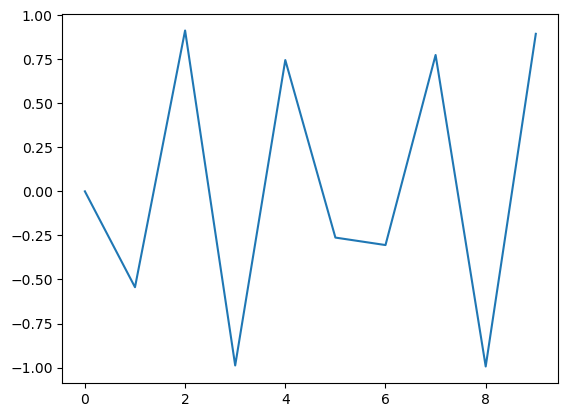

In [39]:
plt.plot(np.arange(10),signal1[:10])

In [40]:
analytic_signal1 = hilbert(signal1)
analytic_signal2 = hilbert(signal2)

phase1 = np.unwrap(np.angle(analytic_signal1))
phase2 = np.unwrap(np.angle(analytic_signal2))

phase_diff = np.mean(phase1 - phase2)
phase_diff

0.999134718142163

In [49]:
2*np.pi*np.fft.fftfreq(signal1.shape[0])[np.argmax(np.fft.fft(signal1))]

-2.5709518004963345

/home/alireza-astane/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


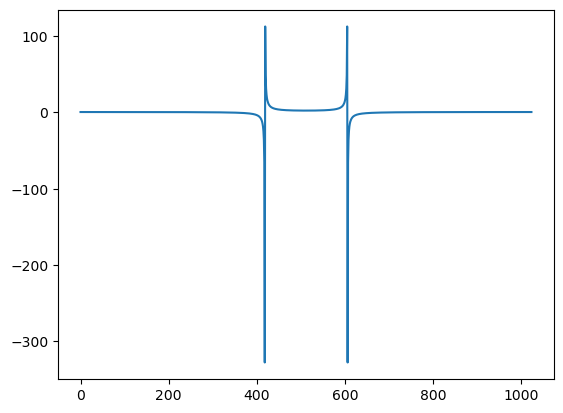

In [48]:
plt.plot(np.arange(1024),np.fft.fft(signal1))

In [20]:
# phase1 = np.array ([1.570796 ,-2.318428 ,0.305581 ,2.832417 ,-0.793640 ,1.808509 ,-1.860202 ,0.753398 ,-2.973447 ,-0.394372 ,2.127776 ,-1.618099 ,0.925777 ,-2.818448 ,-0.235429 ,2.333241 ,-1.356640 ,1.231447 ,-2.476424 ,0.105914 ,2.656865 ,-1.066562 ,1.480014 ,-2.255620 ,0.309840 ,2.868515 ,-0.833031 ,1.742855 ,-1.961430 ,0.619144 ,-3.100755 ,-0.531445 ,2.020923 ,-1.706778 ,0.851834 ,-2.875607 ,-0.302695 ,2.265156 ,-1.440037 ,1.136762 ,-2.576494 ,-0.002958 ,2.555538 ,-1.165374 ,1.391450 ,-2.335180 ,0.231211 ,2.793900 ,-0.914405 ,1.657848 ,-2.052254 ,0.522241 ,3.086195 ,-0.629577 ,1.928455 ,-1.795284 ,0.766903 ,-2.956170 ,-0.385336 ,2.182513 ,-1.527019 ,1.046268 ,-2.668790 ,-0.098172 ,2.462687 ,-1.257364 ,1.302949 ,-2.420429 ,0.146448 ,2.710765 ,-1.000069 ,1.570737 ,-2.141767 ,0.430132 ,2.994339 ,-0.722249 ,1.838214 ,-1.883753 ,0.680055 ,-3.040979 ,-0.471058 ,2.096812 ,-1.614806 ,0.956728 ,-2.759231 ,-0.190088 ,2.371964 ,-1.347629 ,1.214472 ,-2.507192 ,0.059956 ,2.625158 ,-1.087036 ,1.482962 ,-2.230870 ,0.339562 ,2.903920 ,-0.813115 ,1.748733 ,-1.972200 ,0.592540 ,-3.127295 ,-0.557912 ,2.009962 ,-1.702909 ,0.867548 ,-2.848948 ,-0.280704 ,2.282094 ,-1.437194 ,1.126012 ,-2.594571 ,-0.027264 ,2.538493 ,-1.174574 ,1.394887 ,-2.319798 ,0.249676 ,2.814152 ,-0.903158 ,1.659606 ,-2.060627 ,0.504718 ,3.068865 ,-0.645310 ,1.922551 ,-1.791171 ,0.778537 ,-2.938310 ,-0.370671 ,2.192655 ,-1.526400 ,1.037565 ,-2.682259 ,-0.114857 ,2.451276 ,-1.262416 ,1.306646 ,-2.408636 ,0.160153 ,2.724734 ,-0.992751 ,1.570675 ,-2.149037 ,0.416731 ,2.981450 ,-0.733013 ,1.834817 ,-1.879529 ,0.689617 ,-3.027470 ,-0.460266 ,2.103468 ,-1.615393 ,0.949132 ,-2.770122 ,-0.202668 ,2.363730 ,-1.350444 ,1.218299 ,-2.497424 ,0.070847 ,2.635528 ,-1.082069 ,1.481869 ,-2.237431 ,0.328645 ,2.893795 ,-0.820908 ,1.746879 ,-1.967950 ,0.600750 ,-3.116504 ,-0.549625 ,2.014443 ,-1.704245 ,0.860710 ,-2.858095 ,-0.290621 ,2.275970 ,-1.438594 ,1.129879 ,-2.586183 ,-0.018318 ,2.546464 ,-1.171203 ,1.393148 ,-2.325810 ,0.240495 ,2.805981 ,-0.908932 ,1.658800 ,-2.056417 ,0.511916 ,3.077731 ,-0.638823 ,1.925531 ,-1.792998 ,0.772298 ,-2.946141 ,-0.378670 ,2.188059 ,-1.526832 ,1.041404 ,-2.674922 ,-0.107386 ,2.457498 ,-1.260204 ,1.304489 ,-2.414176 ,0.152300 ,2.718053 ,-0.997050 ,1.570616 ,-2.144920 ,0.423103 ,2.988841 ,-0.727902 ,1.836702 ,-1.881676 ,0.683895 ,-3.034239 ,-0.466791 ,2.100037 ,-1.615136 ,0.952886 ,-2.763648 ,-0.196383 ,2.368608 ,-1.349104 ,1.215878 ,-2.502531 ,0.064074 ,2.630040 ,-1.085240 ,1.482352 ,-2.233450 ,0.334305 ,2.899997 ,-0.816892 ,1.747937 ,-1.970295 ,0.595501 ,-3.122376 ,-0.554966 ,2.011927 ,-1.703493 ,0.864333 ,-2.852364 ,-0.285324 ,2.279775 ,-1.437925 ,1.127306 ,-2.590875 ,-0.024178 ,2.541959 ,-1.173486 ,1.394023 ,-2.322003 ,0.245518 ,2.811190 ,-0.905809 ,1.659224 ,-2.058866 ,0.507114 ,3.072642 ,-0.643185 ,1.923746 ,-1.791893 ,0.775752 ,-2.941074 ,-0.374219 ,2.190991 ,-1.526681 ,1.038766 ,-2.679210 ,-0.112449 ,2.453823 ,-1.261780 ,1.305640 ,-2.410576 ,0.156740 ,2.722412 ,-0.994665 ,1.570555 ,-2.147396 ,0.418733 ,2.984448 ,-0.731442 ,1.835506 ,-1.880329 ,0.687146 ,-3.029777 ,-0.463076 ,2.102247 ,-1.615382 ,0.950252 ,-2.767539 ,-0.200739 ,2.365640 ,-1.350115 ,1.217211 ,-2.499164 ,0.067971 ,2.633661 ,-1.083469 ,1.481923 ,-2.235893 ,0.330356 ,2.896231 ,-0.819731 ,1.747213 ,-1.968796 ,0.598520 ,-3.118474 ,-0.551899 ,2.013539 ,-1.704035 ,0.861762 ,-2.855862 ,-0.289045 ,2.277414 ,-1.438484 ,1.128743 ,-2.587766 ,-0.020790 ,2.544934 ,-1.172227 ,1.393324 ,-2.324360 ,0.241982 ,2.807992 ,-0.908049 ,1.658875 ,-2.057290 ,0.509878 ,3.076021 ,-0.640690 ,1.924863 ,-1.792645 ,0.773291 ,-2.944181 ,-0.377365 ,2.189150 ,-1.526886 ,1.040239 ,-2.676380 ,-0.109542 ,2.456229 ,-1.260943 ,1.304754 ,-2.412803 ,0.153611 ,2.719734 ,-0.996394 ,1.570495 ,-2.145808 ,0.421221 ,2.987337 ,-0.729452 ,1.836217 ,-1.881217 ,0.684838 ,-3.032498 ,-0.465701 ,2.100850 ,-1.615316 ,0.951704 ,-2.765002 ,-0.198284 ,2.367545 ,-1.349620 ,1.216210 ,-2.501223 ,0.065240 ,2.631455 ,-1.084765 ,1.482078 ,-2.234348 ,0.332553 ,2.898660 ,-0.818185 ,1.747597 ,-1.969755 ,0.596399 ,-3.120816 ,-0.554051 ,2.012517 ,-1.703773 ,0.863142 ,-2.853632 ,-0.287015 ,2.278882 ,-1.438261 ,1.127690 ,-2.589624 ,-0.023132 ,2.543155 ,-1.173159 ,1.393624 ,-2.322907 ,0.243876 ,2.809992 ,-0.906890 ,1.659004 ,-2.058262 ,0.507973 ,3.074049 ,-0.642417 ,1.924151 ,-1.792255 ,0.774555 ,-2.942267 ,-0.375734 ,2.190238 ,-1.526868 ,1.039192 ,-2.678010 ,-0.111506 ,2.454834 ,-1.261577 ,1.305139 ,-2.411482 ,0.155193 ,2.721333 ,-0.995568 ,1.570434 ,-2.146740 ,0.419558 ,2.985725 ,-0.730798 ,1.835753 ,-1.880760 ,0.685946 ,-3.030906 ,-0.464439 ,2.101615 ,-1.615441 ,0.950715 ,-2.766382 ,-0.199883 ,2.366492 ,-1.350018 ,1.216622 ,-2.500073 ,0.066506 ,2.632685 ,-1.084218 ,1.481889 ,-2.235191 ,0.331151 ,2.897395 ,-0.819195 ,1.747324 ,-1.969287 ,0.597317 ,-3.119547 ,-0.553130 ,2.013013 ,-1.703983 ,0.862255 ,-2.854744 ,-0.288266 ,2.278127 ,-1.438482 ,1.128076 ,-2.588677 ,-0.022181 ,2.544049 ,-1.172839 ,1.393366 ,-2.323619 ,0.242751 ,2.809057 ,-0.907609 ,1.658864 ,-2.057835 ,0.508672 ,3.074998 ,-0.641803 ,1.924431 ,-1.792494 ,0.773812 ,-2.943098 ,-0.376656 ,2.189738 ,-1.526967 ,1.039502 ,-2.677292 ,-0.110868 ,2.455425 ,-1.261432 ,1.304864 ,-2.412025 ,0.154356 ,2.720708 ,-0.996041 ,1.570374 ,-2.146402 ,0.420013 ,2.986359 ,-0.730458 ,1.835869 ,-1.880976 ,0.685384 ,-3.031446 ,-0.465054 ,2.101325 ,-1.615475 ,0.950903 ,-2.765917 ,-0.199551 ,2.366816 ,-1.349997 ,1.216384 ,-2.500410 ,0.065964 ,2.632347 ,-1.084491 ,1.481854 ,-2.234988 ,0.331341 ,2.897724 ,-0.819093 ,1.747329 ,-1.969429 ,0.596971 ,-3.119790 ,-0.553462 ,2.012885 ,-1.704004 ,0.862279 ,-2.854550 ,-0.288228 ,2.278221 ,-1.438532 ,1.127925 ,-2.588778 ,-0.022426 ,2.543971 ,-1.172960 ,1.393304 ,-2.323590 ,0.242659 ,2.809094 ,-0.907706 ,1.658811 ,-2.057855 ,0.508569 ,3.075051 ,-0.641881 ,1.924419 ,-1.792556 ,0.773632 ,-2.943189 ,-0.376897 ,2.189644 ,-1.527037 ,1.039485 ,-2.677130 ,-0.110816 ,2.455578 ,-1.261450 ,1.304725 ,-2.412210 ,0.153970 ,2.720470 ,-0.996295 ,1.570314 ,-2.146253 ,0.420179 ,2.986706 ,-0.730313 ,1.835924 ,-1.881129 ,0.684963 ,-3.031834 ,-0.465555 ,2.101084 ,-1.615512 ,0.951065 ,-2.765467 ,-0.199209 ,2.367167 ,-1.349961 ,1.216115 ,-2.500844 ,0.065275 ,2.631856 ,-1.084859 ,1.481840 ,-2.234625 ,0.331798 ,2.898356 ,-0.818760 ,1.747399 ,-1.969724 ,0.596274 ,-3.120481 ,-0.554200 ,2.012544 ,-1.703955 ,0.862664 ,-2.853792 ,-0.287605 ,2.278734 ,-1.438495 ,1.127475 ,-2.589493 ,-0.023423 ,2.543252 ,-1.173394 ,1.393390 ,-2.322972 ,0.243426 ,2.810000 ,-0.907224 ,1.658843 ,-2.058341 ,0.507566 ,3.074056 ,-0.642829 ,1.924025 ,-1.792366 ,0.774282 ,-2.942107 ,-0.376007 ,2.190277 ,-1.527052 ,1.038804 ,-2.678156 ,-0.112122 ,2.454661 ,-1.261900 ,1.304963 ,-2.411292 ,0.155061 ,2.721635 ,-0.995706 ,1.570253 ,-2.146980 ,0.418839 ,2.985407 ,-0.731439 ,1.835528 ,-1.880743 ,0.685918 ,-3.030412 ,-0.464416 ,2.101794 ,-1.615634 ,0.950103 ,-2.766831 ,-0.200819 ,2.366084 ,-1.350374 ,1.216561 ,-2.499588 ,0.066702 ,2.633258 ,-1.084208 ,1.481628 ,-2.235642 ,0.330095 ,2.896760 ,-0.820027 ,1.747056 ,-1.969086 ,0.597573 ,-3.118710 ,-0.552835 ,2.013281 ,-1.704242 ,0.861370 ,-2.855519 ,-0.289513 ,2.277525 ,-1.438813 ,1.128186 ,-2.587858 ,-0.021652 ,2.544867 ,-1.172733 ,1.392965 ,-2.324328 ,0.241335 ,2.808117 ,-0.908592 ,1.658610 ,-2.057391 ,0.509246 ,3.076184 ,-0.641266 ,1.924736 ,-1.792879 ,0.772603 ,-2.944219 ,-0.378201 ,2.188984 ,-1.527214 ,1.039839 ,-2.676102 ,-0.110002 ,2.456459 ,-1.261283 ,1.304262 ,-2.413039 ,0.152558 ,2.719479 ,-0.997128 ,1.570194 ,-2.145656 ,0.420939 ,2.987896 ,-0.729710 ,1.836153 ,-1.881548 ,0.683802 ,-3.032930 ,-0.466881 ,2.100465 ,-1.615572 ,0.951521 ,-2.764318 ,-0.198349 ,2.368030 ,-1.349861 ,1.215513 ,-2.501777 ,0.063766 ,2.630847 ,-1.085632 ,1.481811 ,-2.233879 ,0.332653 ,2.899613 ,-0.818171 ,1.747530 ,-1.970251 ,0.594962 ,-3.121654 ,-0.555550 ,2.011971 ,-1.703882 ,0.863237 ,-2.852506 ,-0.286694 ,2.279576 ,-1.438472 ,1.126714 ,-2.590543 ,-0.025044 ,2.542224 ,-1.174099 ,1.393464 ,-2.322052 ,0.244388 ,2.811333 ,-0.906651 ,1.658858 ,-2.058993 ,0.506080 ,3.072795 ,-0.644206 ,1.923506 ,-1.792139 ,0.774991 ,-2.940660 ,-0.375037 ,2.191095 ,-1.527121 ,1.037857 ,-2.679343 ,-0.113872 ,2.453612 ,-1.262523 ,1.305161 ,-2.410171 ,0.156150 ,2.723055 ,-0.995153 ,1.570131 ,-2.147781 ,0.417148 ,2.984044 ,-0.732846 ,1.835076 ,-1.880331 ,0.686789 ,-3.028777 ,-0.463378 ,2.102579 ,-1.615813 ,0.948931 ,-2.768183 ,-0.202723 ,2.365012 ,-1.350895 ,1.216908 ,-2.498222 ,0.067942 ,2.634781 ,-1.083683 ,1.481338 ,-2.236624 ,0.328157 ,2.895275 ,-0.821468 ,1.746686 ,-1.968447 ,0.598641 ,-3.116847 ,-0.551715 ,2.014022 ,-1.704559 ,0.859923 ,-2.857070 ,-0.291600 ,2.276427 ,-1.439206 ,1.128718 ,-2.586192 ,-0.020228 ,2.546511 ,-1.172246 ,1.392462 ,-2.325534 ,0.239093 ,2.806483 ,-0.910067 ,1.658348 ,-2.056468 ,0.510560 ,3.078327 ,-0.640049 ,1.925414 ,-1.793373 ,0.770810 ,-2.946019 ,-0.380513 ,2.187860 ,-1.527437 ,1.040607 ,-2.674057 ,-0.108348 ,2.458249 ,-1.260851 ,1.303480 ,-2.414533 ,0.149931 ,2.717661 ,-0.998638 ,1.570075 ,-2.144363 ,0.422569 ,2.990396 ,-0.728375 ,1.836741 ,-1.882276 ,0.681556 ,-3.035051 ,-0.469475 ,2.099315 ,-1.615566 ,0.952603 ,-2.761777 ,-0.196399 ,2.370001 ,-1.349510 ,1.214356 ,-2.503652 ,0.060635 ,2.628793 ,-1.087176 ,1.481891 ,-2.232085 ,0.334703 ,2.902581 ,-0.816687 ,1.747980 ,-1.971302 ,0.592105 ,-3.124202 ,-0.558513 ,2.010798 ,-1.703551 ,0.864751 ,-2.849291 ,-0.284347 ,2.281779 ,-1.438246 ,1.125027 ,-2.592947 ,-0.028860 ,2.539857 ,-1.175668 ,1.393833 ,-2.319555 ,0.247024 ,2.814940 ,-0.904975 ,1.659093 ,-2.060512 ,0.502355 ,3.069650 ,-0.647670 ,1.922320 ,-1.791322 ,0.777130 ,-2.936483 ,-0.372132 ,2.193602 ,-1.527096 ,1.035382 ,-2.682518 ,-0.118673 ,2.450807 ,-1.264098 ,1.305974 ,-2.406623 ,0.159647 ,2.727591 ,-0.993217 ,1.570006 ,-2.150019 ,0.412117 ,2.980012 ,-0.737031 ,1.833898 ,-1.878743 ,0.689895 ,-3.023129 ,-0.459634 ,2.105513 ,-1.616135 ,0.945197 ,-2.772566 ,-0.209044 ,2.361551 ,-1.352428 ,1.218459 ,-2.492978 ,0.072816 ,2.640776 ,-1.081367 ,1.480567 ,-2.240067 ,0.320974 ,2.889803 ,-0.826786 ,1.745573 ,-1.965513 ,0.603396 ,-3.108717 ,-0.546577 ,2.017613 ,-1.705540 ,0.853944 ,-2.863572 ,-0.300543 ,2.271866 ,-1.440571 ,1.131644 ,-2.577855 ,-0.012860 ,2.555118 ,-1.169304 ,1.390374 ,-2.331299 ,0.227832 ,2.798314 ,-0.917441 ,1.657454 ,-2.050808 ,0.518610 ,3.091393 ,-0.632160 ,1.930200 ,-1.795832 ,0.760029 ,-2.956996 ,-0.394928 ,2.181058 ,-1.528254 ,1.046680 ,-2.658729 ,-0.095318 ,2.472780 ,-1.256601 ,1.297970 ,-2.426080 ,0.128597 ,2.702851 ,-1.010946 ,1.569969 ,-2.131279 ,0.439657 ,3.017210 ,-0.712740 ,1.844684 ,-1.889572 ,0.655420 ,-3.060351 ,-0.501411 ,2.085362 ,-1.613935 ,0.970401 ,-2.719710 ,-0.160600 ,2.409725 ,-1.339932 ,1.190886 ,-2.545353 ,-0.015019 ,2.577054 ,-1.127457 ,1.488158 ,-2.163569 ,0.429651 ,3.078677 ,-0.697435 ,1.820662 ,-2.116249 ,-0.291804 ])
phase1.shape

(1024,)

In [26]:
np.unwrap(np.angle(analytic_signal2))

array([9.69921212e-01, 3.14257411e+00, 5.85866529e+00, ...,
       2.62065825e+03, 2.62334608e+03, 2.62546757e+03])

In [30]:
unw1 = np.array ([7.853982 ,3.964758 ,6.588766 ,9.115603 ,5.489545 ,8.091694 ,-1.860202 ,7.036583 ,-2.973447 ,5.888813 ,2.127776 ,4.665087 ,0.925777 ,3.464737 ,6.047756 ,8.616426 ,4.926545 ,7.514632 ,-2.476424 ,6.389099 ,8.940050 ,-1.066562 ,1.480014 ,-2.255620 ,0.309840 ,9.151700 ,5.450154 ,8.026040 ,4.321755 ,6.902329 ,-3.100755 ,5.751741 ,8.304109 ,-1.706778 ,0.851834 ,-2.875607 ,-0.302695 ,8.548341 ,4.843148 ,7.419947 ,3.706691 ,6.280228 ,8.838723 ,5.117811 ,7.674635 ,-2.335180 ,0.231211 ,9.077085 ,-0.914405 ,7.941034 ,4.230932 ,6.805426 ,3.086195 ,5.653608 ,8.211640 ,4.487902 ,7.050088 ,-2.956170 ,-0.385336 ,8.465698 ,-1.527019 ,7.329454 ,3.614395 ,6.185013 ,2.462687 ,5.025821 ,7.586134 ,3.862757 ,6.429634 ,8.993951 ,-1.000069 ,7.853922 ,-2.141767 ,6.713317 ,2.994339 ,5.560936 ,1.838214 ,4.399432 ,6.963240 ,3.242207 ,5.812128 ,8.379998 ,-1.614806 ,7.239913 ,-2.759231 ,6.093097 ,2.371964 ,4.935556 ,1.214472 ,3.775994 ,6.343141 ,8.908343 ,5.196149 ,7.766148 ,-2.230870 ,6.622747 ,9.187106 ,-0.813115 ,1.748733 ,-1.972200 ,0.592540 ,3.155890 ,5.725273 ,8.293148 ,4.580277 ,7.150733 ,-2.848948 ,6.002482 ,8.565279 ,-1.437194 ,1.126012 ,-2.594571 ,-0.027264 ,8.821679 ,5.108611 ,7.678073 ,3.963387 ,6.532861 ,9.097337 ,5.380027 ,7.942791 ,-2.060627 ,0.504718 ,9.352050 ,-0.645310 ,8.205736 ,4.492014 ,7.061722 ,3.344875 ,5.912514 ,8.475841 ,4.756785 ,7.320751 ,-2.682259 ,-0.114857 ,8.734461 ,-1.262416 ,7.589831 ,3.874549 ,6.443339 ,2.724734 ,5.290434 ,7.853861 ,4.134149 ,6.699916 ,9.264635 ,-0.733013 ,8.118003 ,-1.879529 ,6.972803 ,3.255715 ,5.822919 ,2.103468 ,4.667793 ,7.232317 ,3.513063 ,6.080517 ,8.646916 ,-1.350444 ,7.501484 ,-2.497424 ,6.354033 ,2.635528 ,5.201116 ,1.481869 ,4.045755 ,6.611830 ,9.176981 ,5.462277 ,8.030065 ,-1.967950 ,6.883936 ,-3.116504 ,5.733560 ,2.014443 ,4.578940 ,0.860710 ,3.425090 ,5.992564 ,8.559155 ,4.844591 ,7.413064 ,-2.586183 ,6.264867 ,8.829649 ,-1.171203 ,1.393148 ,-2.325810 ,0.240495 ,9.089166 ,5.374253 ,7.941985 ,4.226768 ,6.795101 ,9.360916 ,5.644363 ,8.208716 ,-1.792998 ,0.772298 ,-2.946141 ,-0.378670 ,8.471245 ,4.756353 ,7.324589 ,3.608264 ,6.175799 ,8.740684 ,5.022982 ,7.587674 ,-2.414176 ,0.152300 ,9.001238 ,-0.997050 ,7.853801 ,4.138266 ,6.706288 ,2.988841 ,5.555283 ,8.119887 ,4.401509 ,6.967081 ,-3.034239 ,-0.466791 ,8.383222 ,-1.615136 ,7.236071 ,3.519538 ,6.086802 ,2.368608 ,4.934081 ,7.499063 ,3.780654 ,6.347259 ,8.913225 ,-1.085240 ,7.765537 ,-2.233450 ,6.617490 ,2.899997 ,5.466294 ,1.747937 ,4.312891 ,6.878686 ,3.160809 ,5.728219 ,8.295112 ,-1.703493 ,7.147518 ,-2.852364 ,5.997862 ,2.279775 ,4.845260 ,1.127306 ,3.692310 ,6.259008 ,8.825145 ,5.109699 ,7.677208 ,-2.322003 ,6.528703 ,9.094375 ,-0.905809 ,1.659224 ,-2.058866 ,0.507114 ,9.355827 ,5.640000 ,8.206931 ,4.491292 ,7.058937 ,-2.941074 ,5.908966 ,8.474176 ,-1.526681 ,1.038766 ,-2.679210 ,-0.112449 ,8.737009 ,5.021405 ,7.588825 ,3.872610 ,6.439926 ,9.005598 ,5.288520 ,7.853740 ,-2.147396 ,0.418733 ,9.267633 ,-0.731442 ,8.118691 ,4.402857 ,6.970331 ,3.253408 ,5.820109 ,8.385433 ,4.667803 ,7.233437 ,-2.767539 ,-0.200739 ,8.648825 ,-1.350115 ,7.500396 ,3.784021 ,6.351156 ,2.633661 ,5.199716 ,7.765108 ,4.047292 ,6.613541 ,9.179416 ,-0.819731 ,8.030399 ,-1.968796 ,6.881706 ,3.164711 ,5.731286 ,2.013539 ,4.579151 ,7.144947 ,3.427324 ,5.994141 ,8.560599 ,-1.438484 ,7.411928 ,-2.587766 ,6.262396 ,2.544934 ,5.110958 ,1.393324 ,3.958825 ,6.525168 ,9.091178 ,5.375136 ,7.942060 ,-2.057290 ,6.793063 ,9.359206 ,-0.640690 ,1.924863 ,-1.792645 ,0.773291 ,3.339004 ,5.905820 ,8.472335 ,4.756300 ,7.323424 ,-2.676380 ,6.173644 ,8.739414 ,-1.260943 ,1.304754 ,-2.412803 ,0.153611 ,9.002919 ,5.286791 ,7.853681 ,4.137377 ,6.704406 ,9.270522 ,5.553733 ,8.119402 ,-1.881217 ,0.684838 ,-3.032498 ,-0.465701 ,8.384036 ,4.667869 ,7.234889 ,3.518183 ,6.084902 ,8.650730 ,4.933565 ,7.499396 ,-2.501223 ,0.065240 ,8.914640 ,-1.084765 ,7.765263 ,4.048837 ,6.615738 ,2.898660 ,5.465000 ,8.030783 ,4.313430 ,6.879584 ,-3.120816 ,-0.554051 ,8.295702 ,-1.703773 ,7.146327 ,3.429553 ,5.996170 ,2.278882 ,4.844924 ,7.410876 ,3.693561 ,6.260054 ,8.826340 ,-1.173159 ,7.676810 ,-2.322907 ,6.527061 ,2.809992 ,5.376295 ,1.659004 ,4.224924 ,6.791158 ,9.357235 ,5.640769 ,8.207336 ,-1.792255 ,7.057740 ,-2.942267 ,5.907451 ,2.190238 ,4.756318 ,1.039192 ,3.605175 ,6.171680 ,8.738020 ,5.021608 ,7.588324 ,-2.411482 ,6.438378 ,9.004519 ,-0.995568 ,1.570434 ,-2.146740 ,0.419558 ,9.268911 ,5.552388 ,8.118938 ,4.402425 ,6.969131 ,-3.030906 ,5.818746 ,8.384801 ,-1.615441 ,0.950715 ,-2.766382 ,-0.199883 ,8.649677 ,4.933167 ,7.499807 ,3.783112 ,6.349692 ,8.915871 ,5.198968 ,7.765074 ,-2.235191 ,0.331151 ,9.180580 ,-0.819195 ,8.030509 ,4.313898 ,6.880503 ,3.163639 ,5.730056 ,8.296198 ,4.579202 ,7.145440 ,-2.854744 ,-0.288266 ,8.561312 ,-1.438482 ,7.411261 ,3.694509 ,6.261004 ,2.544049 ,5.110346 ,7.676551 ,3.959566 ,6.525936 ,9.092242 ,-0.907609 ,7.942050 ,-2.057835 ,6.791858 ,3.074998 ,5.641382 ,1.924431 ,4.490691 ,7.056997 ,3.340088 ,5.906529 ,8.472924 ,-1.526967 ,7.322687 ,-2.677292 ,6.172317 ,2.455425 ,5.021753 ,1.304864 ,3.871161 ,6.437541 ,9.003893 ,5.287145 ,7.853560 ,-2.146402 ,6.703198 ,9.269544 ,-0.730458 ,1.835869 ,-1.880976 ,0.685384 ,3.251740 ,5.818131 ,8.384510 ,4.667710 ,7.234088 ,-2.765917 ,6.083634 ,8.650001 ,-1.349997 ,1.216384 ,-2.500410 ,0.065964 ,8.915532 ,5.198694 ,7.765040 ,4.048198 ,6.614526 ,9.180909 ,5.464092 ,8.030514 ,-1.969429 ,0.596971 ,-3.119790 ,-0.553462 ,8.296071 ,4.579181 ,7.145464 ,3.428635 ,5.994957 ,8.561407 ,4.844653 ,7.411110 ,-2.588778 ,-0.022426 ,8.827156 ,-1.172960 ,7.676490 ,3.959595 ,6.525844 ,2.809094 ,5.375479 ,7.941996 ,4.225331 ,6.791755 ,9.358236 ,-0.641881 ,8.207604 ,-1.792556 ,7.056817 ,3.339996 ,5.906288 ,2.189644 ,4.756148 ,7.322671 ,3.606055 ,6.172369 ,8.738764 ,-1.261450 ,7.587910 ,-2.412210 ,6.437155 ,2.720470 ,5.286890 ,1.570314 ,4.136932 ,6.703364 ,9.269891 ,5.552872 ,8.119109 ,-1.881129 ,6.968148 ,-3.031834 ,5.817630 ,2.101084 ,4.667673 ,0.951065 ,3.517718 ,6.083977 ,8.650352 ,4.933224 ,7.499300 ,-2.500844 ,6.348460 ,8.915041 ,-1.084859 ,1.481840 ,-2.234625 ,0.331798 ,9.181541 ,5.464425 ,8.030584 ,4.313462 ,6.879459 ,-3.120481 ,5.728985 ,8.295729 ,-1.703955 ,0.862664 ,-2.853792 ,-0.287605 ,8.561919 ,4.844691 ,7.410660 ,3.693692 ,6.259762 ,8.826438 ,5.109791 ,7.676575 ,-2.322972 ,0.243426 ,9.093185 ,-0.907224 ,7.942028 ,4.224845 ,6.790751 ,3.074056 ,5.640357 ,8.207210 ,4.490819 ,7.057467 ,-2.942107 ,-0.376007 ,8.473462 ,-1.527052 ,7.321990 ,3.605030 ,6.171063 ,2.454661 ,5.021285 ,7.588148 ,3.871893 ,6.438247 ,9.004820 ,-0.995706 ,7.853438 ,-2.146980 ,6.702024 ,2.985407 ,5.551747 ,1.835528 ,4.402442 ,6.969104 ,3.252773 ,5.818769 ,8.384979 ,-1.615634 ,7.233288 ,-2.766831 ,6.082366 ,2.366084 ,4.932811 ,1.216561 ,3.783598 ,6.349888 ,8.916443 ,5.198977 ,7.764814 ,-2.235642 ,6.613281 ,9.179946 ,-0.820027 ,1.747056 ,-1.969086 ,0.597573 ,3.164475 ,5.730350 ,8.296466 ,4.578943 ,7.144555 ,-2.855519 ,5.993672 ,8.560710 ,-1.438813 ,1.128186 ,-2.587858 ,-0.021652 ,8.828052 ,5.110453 ,7.676151 ,3.958857 ,6.524520 ,9.091302 ,5.374594 ,7.941796 ,-2.057391 ,0.509246 ,9.359369 ,-0.641266 ,8.207921 ,4.490306 ,7.055789 ,3.338967 ,5.904984 ,8.472169 ,4.755972 ,7.323024 ,-2.676102 ,-0.110002 ,8.739644 ,-1.261283 ,7.587447 ,3.870146 ,6.435744 ,2.719479 ,5.286058 ,7.853380 ,4.137529 ,6.704125 ,9.271082 ,-0.729710 ,8.119339 ,-1.881548 ,6.966987 ,3.250255 ,5.816305 ,2.100465 ,4.667614 ,7.234707 ,3.518867 ,6.084836 ,8.651215 ,-1.349861 ,7.498698 ,-2.501777 ,6.346951 ,2.630847 ,5.197554 ,1.481811 ,4.049307 ,6.615838 ,9.182798 ,5.465014 ,8.030715 ,-1.970251 ,6.878147 ,-3.121654 ,5.727635 ,2.011971 ,4.579303 ,0.863237 ,3.430680 ,5.996491 ,8.562762 ,4.844713 ,7.409899 ,-2.590543 ,6.258141 ,8.825410 ,-1.174099 ,1.393464 ,-2.322052 ,0.244388 ,9.094518 ,5.376535 ,7.942044 ,4.224192 ,6.789265 ,9.355980 ,5.638979 ,8.206692 ,-1.792139 ,0.774991 ,-2.940660 ,-0.375037 ,8.474280 ,4.756065 ,7.321042 ,3.603842 ,6.169313 ,8.736797 ,5.020663 ,7.588346 ,-2.410171 ,0.156150 ,9.006240 ,-0.995153 ,7.853317 ,4.135404 ,6.700333 ,2.984044 ,5.550339 ,8.118261 ,4.402854 ,6.969975 ,-3.028777 ,-0.463378 ,8.385764 ,-1.615813 ,7.232117 ,3.515003 ,6.080463 ,2.365012 ,4.932290 ,7.500093 ,3.784963 ,6.351127 ,8.917966 ,-1.083683 ,7.764523 ,-2.236624 ,6.611343 ,2.895275 ,5.461717 ,1.746686 ,4.314738 ,6.881826 ,3.166338 ,5.731470 ,8.297207 ,-1.704559 ,7.143109 ,-2.857070 ,5.991586 ,2.276427 ,4.843980 ,1.128718 ,3.696993 ,6.262957 ,8.829696 ,5.110939 ,7.675647 ,-2.325534 ,6.522278 ,9.089668 ,-0.910067 ,1.658348 ,-2.056468 ,0.510560 ,9.361512 ,5.643136 ,8.208600 ,4.489812 ,7.053995 ,-2.946019 ,5.902673 ,8.471045 ,-1.527437 ,1.040607 ,-2.674057 ,-0.108348 ,8.741435 ,5.022335 ,7.586665 ,3.868652 ,6.433117 ,9.000846 ,5.284547 ,7.853260 ,-2.144363 ,0.422569 ,9.273582 ,-0.728375 ,8.119927 ,4.400909 ,6.964741 ,3.248134 ,5.813710 ,8.382500 ,4.667619 ,7.235788 ,-2.761777 ,-0.196399 ,8.653187 ,-1.349510 ,7.497541 ,3.779533 ,6.343820 ,2.628793 ,5.196009 ,7.765076 ,4.051100 ,6.617888 ,9.185766 ,-0.816687 ,8.031166 ,-1.971302 ,6.875290 ,3.158983 ,5.724672 ,2.010798 ,4.579634 ,7.147936 ,3.433894 ,5.998839 ,8.564964 ,-1.438246 ,7.408212 ,-2.592947 ,6.254325 ,2.539857 ,5.107517 ,1.393833 ,3.963630 ,6.530209 ,9.098126 ,5.378210 ,7.942278 ,-2.060512 ,6.785541 ,9.352835 ,-0.647670 ,1.922320 ,-1.791322 ,0.777130 ,3.346702 ,5.911054 ,8.476787 ,4.756089 ,7.318567 ,-2.682518 ,6.164512 ,8.733993 ,-1.264098 ,1.305974 ,-2.406623 ,0.159647 ,9.010776 ,5.289968 ,7.853192 ,4.133167 ,6.695302 ,9.263197 ,5.546155 ,8.117083 ,-1.878743 ,0.689895 ,-3.023129 ,-0.459634 ,8.388698 ,4.667050 ,7.228382 ,3.510619 ,6.074142 ,8.644736 ,4.930757 ,7.501644 ,-2.492978 ,0.072816 ,8.923961 ,-1.081367 ,7.763752 ,4.043118 ,6.604159 ,2.889803 ,5.456399 ,8.028759 ,4.317672 ,6.886582 ,-3.108717 ,-0.546577 ,8.300799 ,-1.705540 ,7.137129 ,3.419613 ,5.982642 ,2.271866 ,4.842614 ,7.414830 ,3.705330 ,6.270325 ,8.838303 ,-1.169304 ,7.673559 ,-2.331299 ,6.511018 ,2.798314 ,5.365744 ,1.657454 ,4.232378 ,6.801796 ,9.374578 ,5.651025 ,8.213385 ,-1.795832 ,7.043214 ,-2.956996 ,5.888257 ,2.181058 ,4.754931 ,1.046680 ,3.624457 ,6.187868 ,8.755966 ,5.026584 ,7.581156 ,-2.426080 ,6.411783 ,8.986037 ,-1.010946 ,1.569969 ,-2.131279 ,0.439657 ,9.300396 ,5.570446 ,8.127870 ,4.393613 ,6.938605 ,-3.060351 ,5.781774 ,8.368548 ,-1.613935 ,0.970401 ,-2.719710 ,-0.160600 ,8.692911 ,4.943254 ,7.474071 ,3.737832 ,6.268167 ,8.860239 ,5.155729 ,7.771343 ,-2.163569 ,0.429651 ,9.361863 ,-0.697435 ,8.103848 ,4.166937 ,5.991381 ])
unw2 = np.array ([7.025771 ,-3.140611 ,-0.424520 ,8.262812 ,-1.744450 ,7.133243 ,3.352346 ,5.988247 ,2.230171 ,4.820576 ,7.396919 ,3.653384 ,6.256030 ,8.788448 ,-1.192581 ,7.653252 ,-2.360216 ,6.512683 ,2.771097 ,5.356789 ,1.632030 ,4.193535 ,6.774393 ,9.321423 ,5.622213 ,8.178267 ,-1.820651 ,7.037675 ,-2.976517 ,5.888545 ,2.159816 ,4.730209 ,1.016648 ,3.572513 ,6.151955 ,8.706757 ,4.997126 ,7.563943 ,-2.442131 ,6.418182 ,8.973358 ,-1.018760 ,1.544337 ,-2.176139 ,0.397884 ,9.237462 ,5.529604 ,8.091530 ,4.374726 ,6.946788 ,-3.061411 ,5.796700 ,8.356584 ,-1.642004 ,0.926856 ,-2.796759 ,-0.222401 ,8.620510 ,4.907663 ,7.475122 ,3.754017 ,6.327464 ,8.886729 ,5.174463 ,7.739217 ,-2.263832 ,0.307941 ,9.150835 ,-0.843377 ,8.003766 ,4.286460 ,6.857201 ,3.134548 ,5.706665 ,8.268848 ,4.552443 ,7.121015 ,-2.884087 ,-0.312000 ,8.533119 ,-1.464428 ,7.386435 ,3.666157 ,6.237793 ,2.515883 ,5.085192 ,7.650792 ,3.931300 ,6.501919 ,9.063367 ,-0.932518 ,7.915662 ,-2.085105 ,6.768057 ,3.046704 ,5.617269 ,1.897554 ,4.463813 ,7.032215 ,3.311303 ,5.882075 ,8.445280 ,-1.553153 ,7.297798 ,-2.705162 ,6.148552 ,2.427861 ,4.996211 ,1.279136 ,3.843093 ,6.412986 ,8.975529 ,5.261779 ,7.827402 ,-2.173528 ,6.679116 ,9.241793 ,-0.755013 ,1.809288 ,-1.907950 ,0.660326 ,3.223284 ,5.793176 ,8.357219 ,4.641389 ,7.209184 ,-2.793420 ,6.059529 ,8.622856 ,-1.375802 ,1.190642 ,-2.528375 ,0.040998 ,8.887494 ,5.173015 ,7.739055 ,4.021215 ,6.590283 ,9.153571 ,5.439241 ,8.004125 ,-1.996494 ,0.571670 ,9.418326 ,-0.578794 ,8.269031 ,4.552791 ,7.120580 ,3.401440 ,5.970631 ,8.534573 ,4.818645 ,7.385319 ,-2.616702 ,-0.047731 ,8.799342 ,-1.198863 ,7.650655 ,3.932762 ,6.501514 ,2.782090 ,5.350412 ,7.915729 ,4.198169 ,6.766228 ,9.330106 ,-0.667513 ,8.180761 ,-1.818964 ,7.031982 ,3.313077 ,5.881814 ,2.163047 ,4.729968 ,7.296801 ,3.578129 ,6.146771 ,8.711113 ,-1.287510 ,7.562217 ,-2.438882 ,6.412787 ,2.693748 ,5.261653 ,1.544114 ,4.109662 ,6.677617 ,9.241834 ,5.526999 ,8.092435 ,-1.907514 ,6.943386 ,-3.058498 ,5.793052 ,2.074667 ,4.641333 ,0.925090 ,3.489757 ,6.058118 ,8.622829 ,4.907059 ,7.473752 ,-2.527344 ,6.324089 ,8.888559 ,-1.110243 ,1.455663 ,-2.262017 ,0.305833 ,9.153526 ,5.438355 ,8.004067 ,4.287135 ,6.854791 ,9.419465 ,5.704330 ,8.269446 ,-1.730455 ,0.836559 ,-2.881812 ,-0.313700 ,8.534505 ,4.818466 ,7.385265 ,3.667378 ,6.235412 ,8.800161 ,5.084269 ,7.650379 ,-2.350501 ,0.217242 ,9.065190 ,-0.933450 ,7.915667 ,4.198610 ,6.766196 ,3.047860 ,5.615639 ,8.181018 ,4.464152 ,7.031209 ,-2.970206 ,-0.402315 ,8.446150 ,-1.553294 ,7.296762 ,3.578913 ,6.146752 ,2.428561 ,4.995627 ,7.561896 ,3.844209 ,6.411842 ,8.976832 ,-1.022053 ,7.827241 ,-2.173091 ,6.677600 ,2.959430 ,5.526973 ,1.809388 ,4.375595 ,6.942669 ,3.224579 ,5.792267 ,8.357769 ,-1.641855 ,7.208245 ,-2.792737 ,6.058105 ,2.340131 ,4.907008 ,1.190217 ,3.755741 ,6.323262 ,8.888456 ,5.172545 ,7.738793 ,-2.261600 ,6.589005 ,9.154177 ,-0.844858 ,1.720930 ,-1.996131 ,0.570940 ,9.419357 ,5.703675 ,8.269366 ,4.552781 ,7.119716 ,-2.881203 ,5.969470 ,8.534875 ,-1.464775 ,1.101714 ,-2.615907 ,-0.048500 ,8.800065 ,5.083970 ,7.650327 ,3.933082 ,6.500409 ,9.065732 ,5.349700 ,7.915645 ,-2.084656 ,0.482394 ,9.330944 ,-0.668094 ,8.180945 ,4.464243 ,7.031177 ,3.313516 ,5.880844 ,8.446424 ,4.729831 ,7.296389 ,-2.704365 ,-0.137073 ,8.711660 ,-1.287781 ,7.561846 ,3.844585 ,6.411814 ,2.694095 ,5.261089 ,7.827165 ,4.110016 ,6.677031 ,9.242526 ,-0.756669 ,8.092507 ,-1.907473 ,6.942629 ,3.225049 ,5.792229 ,2.074777 ,4.641268 ,7.207871 ,3.490367 ,6.057544 ,8.623242 ,-1.376336 ,7.473350 ,-2.527094 ,6.323220 ,2.605638 ,5.172492 ,1.455491 ,4.021515 ,6.588481 ,9.154103 ,5.437948 ,8.004053 ,-1.995995 ,6.854074 ,9.419766 ,-0.579563 ,1.986308 ,-1.730465 ,0.836163 ,3.401916 ,5.968978 ,8.534812 ,4.818303 ,7.384841 ,-2.615583 ,6.234627 ,8.800360 ,-1.199276 ,1.366994 ,-2.350162 ,0.216745 ,9.065674 ,5.349387 ,7.915585 ,4.198675 ,6.765513 ,9.331297 ,5.615024 ,8.181016 ,-1.819001 ,0.747634 ,-2.969718 ,-0.402770 ,8.446371 ,4.729764 ,7.296321 ,3.579115 ,6.146036 ,8.711893 ,4.995339 ,7.561675 ,-2.438646 ,0.128193 ,8.977240 ,-1.022352 ,7.827105 ,4.110166 ,6.676947 ,2.959641 ,5.526436 ,8.092532 ,4.375662 ,6.942286 ,-3.058166 ,-0.491329 ,8.357918 ,-1.641952 ,7.207790 ,3.490632 ,6.057448 ,2.340234 ,4.906782 ,7.473164 ,3.756064 ,6.322825 ,8.888799 ,-1.110900 ,7.738611 ,-2.261523 ,6.588377 ,2.871168 ,5.437856 ,1.720855 ,4.287151 ,6.853749 ,9.419757 ,5.703301 ,8.269455 ,-1.730477 ,7.119251 ,-2.881036 ,5.968863 ,2.251756 ,4.818236 ,1.101461 ,3.667595 ,6.234273 ,8.800351 ,5.083744 ,7.650106 ,-2.350021 ,6.499804 ,9.065879 ,-0.933900 ,1.632357 ,-2.084535 ,0.482023 ,9.331310 ,5.614750 ,8.180980 ,4.464191 ,7.030702 ,-2.969516 ,5.880282 ,8.446457 ,-1.553483 ,1.012938 ,-2.704055 ,-0.137464 ,8.711897 ,4.995208 ,7.561589 ,3.844670 ,6.411229 ,8.977402 ,5.260725 ,7.827038 ,-2.173026 ,0.393479 ,9.242860 ,-0.756983 ,8.092495 ,4.375679 ,6.942146 ,3.225190 ,5.791706 ,8.357968 ,4.641180 ,7.207594 ,-2.792514 ,-0.226015 ,8.623435 ,-1.376506 ,7.473062 ,3.756180 ,6.322652 ,2.605737 ,5.172173 ,7.738527 ,4.021677 ,6.588119 ,9.154409 ,-0.845525 ,8.003999 ,-1.996012 ,6.853584 ,3.136711 ,5.703135 ,1.986288 ,4.552669 ,7.119061 ,3.402216 ,5.968621 ,8.534965 ,-1.465029 ,7.384525 ,-2.615491 ,6.234075 ,2.517254 ,5.083632 ,1.366824 ,3.933204 ,6.499571 ,9.065955 ,5.349122 ,7.915491 ,-2.084512 ,6.765015 ,9.331417 ,-0.668615 ,1.897788 ,-1.819017 ,0.747337 ,3.313764 ,5.880074 ,8.446486 ,4.729639 ,7.295977 ,-2.703975 ,6.145498 ,8.711952 ,-1.288084 ,1.278301 ,-2.438446 ,0.127837 ,8.977497 ,5.260589 ,7.826973 ,4.110179 ,6.676441 ,9.242937 ,5.526012 ,8.092467 ,-1.907506 ,0.658795 ,-3.057872 ,-0.491656 ,8.357998 ,4.641129 ,7.207420 ,3.490730 ,6.056923 ,8.623461 ,4.906581 ,7.472957 ,-2.526904 ,0.039287 ,8.889034 ,-1.111124 ,7.738443 ,4.021690 ,6.587863 ,2.871271 ,5.437462 ,8.003955 ,4.287200 ,6.853434 ,9.420049 ,-0.580198 ,8.269501 ,-1.730561 ,7.118854 ,3.402252 ,5.968351 ,2.251780 ,4.818072 ,7.384422 ,3.667830 ,6.233923 ,8.800565 ,-1.199646 ,7.649902 ,-2.349980 ,6.499281 ,2.782789 ,5.348920 ,1.632251 ,4.198732 ,6.764884 ,9.331600 ,5.614449 ,8.180992 ,-1.819059 ,7.030279 ,-2.969410 ,5.879781 ,2.163280 ,4.729575 ,1.012695 ,3.579385 ,6.145373 ,8.712090 ,4.995023 ,7.561349 ,-2.438460 ,6.410696 ,8.977489 ,-1.022798 ,1.543726 ,-2.172911 ,0.393146 ,9.243150 ,5.525914 ,8.092473 ,4.375635 ,6.941695 ,-3.057885 ,5.791216 ,8.357960 ,-1.642096 ,0.924149 ,-2.792239 ,-0.226362 ,8.623607 ,4.906514 ,7.472785 ,3.756250 ,6.322109 ,8.889002 ,5.171865 ,7.738379 ,-2.261358 ,0.304590 ,9.154699 ,-0.845801 ,8.003942 ,4.287150 ,6.853103 ,3.136826 ,5.702656 ,8.269448 ,4.552616 ,7.118782 ,-2.880674 ,-0.314910 ,8.535116 ,-1.465175 ,7.384208 ,3.667779 ,6.233520 ,2.517327 ,5.083354 ,7.649840 ,3.933391 ,6.499216 ,9.066245 ,-0.934327 ,7.915398 ,-2.084514 ,6.764503 ,3.048352 ,5.614102 ,1.897745 ,4.464157 ,7.030223 ,3.314082 ,5.879729 ,8.446616 ,-1.553671 ,7.295618 ,-2.703873 ,6.144931 ,2.428833 ,4.994855 ,1.278109 ,3.844965 ,6.410656 ,8.977788 ,5.260339 ,7.826840 ,-2.172985 ,6.675895 ,9.243063 ,-0.757630 ,1.809221 ,-1.907474 ,0.658474 ,3.225657 ,5.791185 ,8.358104 ,4.641026 ,7.207016 ,-2.792335 ,6.056342 ,8.623519 ,-1.376816 ,1.189555 ,-2.526634 ,0.038908 ,8.889326 ,5.171825 ,7.738267 ,4.021736 ,6.587279 ,9.154589 ,5.437018 ,8.003873 ,-1.995903 ,0.569904 ,9.420422 ,-0.580542 ,8.269580 ,4.552547 ,7.118398 ,3.402392 ,5.967753 ,8.535016 ,4.817899 ,7.384178 ,-2.615037 ,-0.049657 ,8.800859 ,-1.199866 ,7.649677 ,3.933279 ,6.498655 ,2.782929 ,5.348490 ,7.915333 ,4.198869 ,6.764513 ,9.332005 ,-0.669080 ,8.181042 ,-1.819109 ,7.029765 ,3.313938 ,5.879165 ,2.163321 ,4.729445 ,7.295606 ,3.579759 ,6.144962 ,8.712386 ,-1.288365 ,7.561068 ,-2.438354 ,6.410021 ,2.694453 ,5.259974 ,1.543597 ,4.110475 ,6.675930 ,9.243592 ,5.525572 ,8.092489 ,-1.907569 ,6.941115 ,-3.057697 ,5.790579 ,2.074805 ,4.641011 ,0.923838 ,3.491385 ,6.056394 ,8.623905 ,4.906331 ,7.472438 ,-2.526792 ,6.321377 ,8.889161 ,-1.111714 ,1.455035 ,-2.261082 ,0.304154 ,9.155184 ,5.437042 ,8.003916 ,4.287168 ,6.852443 ,9.420229 ,5.701995 ,8.269466 ,-1.730586 ,0.835244 ,-2.880158 ,-0.315361 ,8.535415 ,4.817853 ,7.383783 ,3.667965 ,6.232722 ,8.800682 ,5.082985 ,7.649646 ,-2.349428 ,0.215554 ,9.066781 ,-0.934666 ,7.915320 ,4.198734 ,6.763748 ,3.048606 ,5.613414 ,8.180932 ,4.464216 ,7.029821 ,-2.968494 ,-0.403933 ,8.446914 ,-1.553798 ,7.295096 ,3.579551 ,6.144051 ,2.429015 ,4.994518 ,7.561057 ,3.845443 ,6.410129 ,8.978385 ,-1.023183 ,7.826697 ,-2.172868 ,6.675021 ,2.960175 ,5.524836 ,1.809201 ,4.375867 ,6.941195 ,3.226382 ,5.790677 ,8.358399 ,-1.642248 ,7.206369 ,-2.792032 ,6.055361 ,2.340531 ,4.906076 ,1.189262 ,3.757172 ,6.321504 ,8.889999 ,5.171495 ,7.738038 ,-2.261264 ,6.586253 ,9.154938 ,-0.846925 ,1.720641 ,-1.995621 ,0.569362 ,9.421294 ,5.702098 ,8.269867 ,4.552508 ,7.117590 ,-2.880409 ,5.966644 ,8.535229 ,-1.465518 ,1.100628 ,-2.614229 ,-0.050324 ,8.801627 ,5.082997 ,7.649330 ,3.933555 ,6.497429 ,9.066530 ,5.347687 ,7.915248 ,-2.083863 ,0.480683 ,9.333071 ,-0.669672 ,8.181312 ,4.464106 ,7.028736 ,3.314430 ,5.877887 ,8.446739 ,4.729303 ,7.295144 ,-2.702362 ,-0.138993 ,8.713277 ,-1.288671 ,7.560554 ,3.845229 ,6.408522 ,2.694957 ,5.259116 ,7.826642 ,4.111173 ,6.675146 ,9.244927 ,-0.758266 ,8.092726 ,-1.907443 ,6.939769 ,3.226127 ,5.789068 ,2.075060 ,4.641006 ,7.206424 ,3.492817 ,6.055484 ,8.624965 ,-1.377133 ,7.471670 ,-2.526223 ,6.319481 ,2.606599 ,5.170546 ,1.454812 ,4.023170 ,6.586356 ,9.156912 ,5.436310 ,8.004090 ,-1.995748 ,6.850618 ,9.421078 ,-0.583043 ,1.986561 ,-1.730367 ,0.834440 ,3.405027 ,5.966712 ,8.536722 ,4.817620 ,7.382603 ,-2.614391 ,6.230204 ,8.801478 ,-1.201214 ,1.366105 ,-2.347759 ,0.214269 ,9.069134 ,5.347672 ,7.915367 ,4.199232 ,6.761121 ,9.332963 ,5.611011 ,8.181242 ,-1.818349 ,0.745502 ,-2.965527 ,-0.405361 ,8.448619 ,4.729242 ,7.293174 ,3.580803 ,6.140447 ,8.713268 ,4.993383 ,7.560466 ,-2.434959 ,0.125156 ,8.981870 ,-1.024207 ,7.826461 ,4.111217 ,6.670857 ,2.961898 ,5.521406 ,8.092727 ,4.377326 ,6.939469 ,-3.051888 ,-0.494484 ,8.360870 ,-1.642211 ,7.202831 ,3.493185 ,6.049442 ,2.342082 ,4.904748 ,7.471390 ,3.762525 ,6.318761 ,8.896091 ,-1.113027 ,7.737017 ,-2.259549 ,6.578208 ,2.874564 ,5.430268 ,1.721000 ,4.291399 ,6.849580 ,3.148556 ,5.699011 ,8.274487 ,-1.730202 ,7.108771 ,-2.876701 ,5.953028 ,2.254572 ,4.815890 ,1.098498 ,3.684488 ,6.228121 ,8.818911 ,5.081146 ,7.644007 ,-2.346326 ,6.467739 ,9.070901 ,-0.957170 ,1.632202 ,-2.060992 ,0.478201 ,9.401329 ,5.614580 ,8.219419 ,4.460643 ,6.853160 ,-3.025381 ,5.379294 ])


In [33]:
np.mean(unw1 - unw2)

-0.04375022851562502

In [32]:
unwn1 = np.array ([1.570796 ,3.964758 ,6.588766 ,9.115603 ,11.772731 ,14.374880 ,16.989354 ,19.602954 ,22.159294 ,24.738369 ,27.260517 ,29.797828 ,32.341704 ,34.880663 ,37.463683 ,40.032353 ,42.625657 ,45.213744 ,47.789059 ,50.371396 ,52.922348 ,55.482105 ,58.028682 ,60.576233 ,63.141693 ,65.700368 ,68.282007 ,70.857893 ,73.436793 ,76.017368 ,78.580654 ,81.149964 ,83.702332 ,86.257816 ,88.816428 ,91.372172 ,93.945085 ,96.512936 ,99.090927 ,101.667727 ,104.237656 ,106.811193 ,109.369688 ,111.931962 ,114.488785 ,117.045341 ,119.611732 ,122.174421 ,124.749301 ,127.321555 ,129.894638 ,132.469132 ,135.033087 ,137.600500 ,140.158532 ,142.717978 ,145.280165 ,147.840277 ,150.411112 ,152.978960 ,155.552614 ,158.125901 ,160.694028 ,163.264646 ,165.825505 ,168.388639 ,170.948952 ,173.508760 ,176.075637 ,178.639954 ,181.212305 ,183.783111 ,186.353792 ,188.925691 ,191.489898 ,194.056495 ,196.616959 ,199.178177 ,201.741985 ,204.304136 ,206.874058 ,209.441928 ,212.013494 ,214.585029 ,217.152255 ,219.721397 ,222.283449 ,224.847042 ,227.409143 ,229.970665 ,232.537812 ,235.103014 ,237.674005 ,240.244004 ,242.813356 ,245.383789 ,247.948147 ,250.514297 ,253.076145 ,255.638398 ,258.203137 ,260.766487 ,263.335871 ,265.903745 ,268.474059 ,271.044516 ,273.611205 ,276.179450 ,278.742247 ,281.306144 ,283.869350 ,286.431953 ,288.999261 ,291.565017 ,294.135135 ,296.704597 ,299.273097 ,301.842571 ,304.407046 ,306.972922 ,309.535686 ,312.098639 ,314.663983 ,317.228130 ,319.797141 ,322.365001 ,324.934465 ,327.504173 ,330.070511 ,332.638150 ,335.201477 ,337.765606 ,340.329572 ,342.892933 ,345.460335 ,348.026468 ,350.595961 ,353.165023 ,355.732926 ,358.301716 ,360.866296 ,363.431996 ,365.995423 ,368.558896 ,371.124664 ,373.689383 ,376.258105 ,378.825936 ,381.394775 ,383.963921 ,386.530019 ,389.097223 ,391.660957 ,394.225282 ,396.789806 ,399.353737 ,401.921191 ,404.487590 ,407.056601 ,409.625344 ,412.192806 ,414.761078 ,417.325759 ,419.891346 ,422.455285 ,425.019170 ,427.585246 ,430.150396 ,432.718878 ,435.286665 ,437.855021 ,440.423722 ,442.989652 ,445.556532 ,448.120600 ,450.685097 ,453.250052 ,455.814432 ,458.381906 ,460.948497 ,463.517119 ,466.085591 ,468.652716 ,471.220580 ,473.785362 ,476.350881 ,478.915231 ,481.479458 ,484.045763 ,486.611250 ,489.179522 ,491.747254 ,494.315222 ,496.883555 ,499.449370 ,502.016002 ,504.580355 ,507.145012 ,509.710308 ,512.275054 ,514.842525 ,517.409254 ,519.977549 ,522.545784 ,525.112644 ,527.680179 ,530.245064 ,532.810547 ,535.375240 ,537.939760 ,540.506237 ,543.071989 ,545.640072 ,548.207738 ,550.775387 ,553.343410 ,555.909148 ,558.475590 ,561.040194 ,563.605002 ,566.170573 ,568.735624 ,571.303072 ,573.869900 ,576.437912 ,579.005934 ,581.572586 ,584.139851 ,586.704841 ,589.270315 ,591.835297 ,594.400073 ,596.966678 ,599.532644 ,602.100550 ,604.668141 ,607.235525 ,609.803280 ,612.368972 ,614.935268 ,617.500097 ,620.065051 ,622.630847 ,625.196155 ,627.763565 ,630.330458 ,632.898223 ,635.466049 ,638.032537 ,640.599578 ,643.164677 ,645.730161 ,648.295393 ,650.860397 ,653.427094 ,655.993231 ,658.560971 ,661.128480 ,663.695639 ,666.263161 ,668.828832 ,671.395019 ,673.960052 ,676.525148 ,679.091127 ,681.656655 ,684.224013 ,686.790945 ,689.358491 ,691.926135 ,694.492495 ,697.059350 ,699.624560 ,702.190073 ,704.755520 ,707.320729 ,709.887490 ,712.453763 ,715.021345 ,717.588765 ,720.155735 ,722.723051 ,725.288723 ,727.854831 ,730.420050 ,732.985285 ,735.551413 ,738.117129 ,740.684424 ,743.251372 ,745.818723 ,748.386198 ,750.952460 ,753.519161 ,756.084484 ,758.650040 ,761.215674 ,763.781069 ,766.347868 ,768.914247 ,771.481678 ,774.049004 ,776.615814 ,779.182949 ,781.748639 ,784.314694 ,786.880086 ,789.445456 ,792.011704 ,794.577579 ,797.144803 ,799.711747 ,802.278923 ,804.846240 ,807.412431 ,809.979006 ,812.544444 ,815.110055 ,817.675852 ,820.241414 ,822.808231 ,825.374689 ,827.941976 ,830.509203 ,833.075879 ,835.642856 ,838.208580 ,840.774604 ,843.340155 ,845.905656 ,848.471999 ,851.038009 ,853.605153 ,856.172077 ,858.739097 ,861.306265 ,863.872408 ,866.438882 ,869.004436 ,871.570113 ,874.136049 ,876.701762 ,879.268578 ,881.835093 ,884.402243 ,886.969367 ,889.535934 ,892.102772 ,894.668543 ,897.234556 ,899.800253 ,902.365882 ,904.932295 ,907.498418 ,910.065475 ,912.632365 ,915.199246 ,917.766276 ,920.332391 ,922.898788 ,925.464457 ,928.030208 ,930.596263 ,933.162112 ,935.728910 ,938.295461 ,940.862480 ,943.429500 ,945.995979 ,948.562698 ,951.128526 ,953.694546 ,956.260377 ,958.826129 ,961.392592 ,963.958807 ,966.525773 ,969.092615 ,971.659375 ,974.226275 ,976.792383 ,979.358723 ,981.924505 ,984.490338 ,987.056492 ,989.622462 ,992.189227 ,994.755795 ,997.322691 ,999.889606 ,1002.456017 ,1005.022634 ,1007.588531 ,1010.154573 ,1012.720525 ,1015.286395 ,1017.852888 ,1020.419175 ,1022.986046 ,1025.552830 ,1028.119484 ,1030.686266 ,1033.252382 ,1035.818685 ,1038.384579 ,1040.950499 ,1043.516734 ,1046.082810 ,1048.649530 ,1051.216097 ,1053.782876 ,1056.349686 ,1058.916050 ,1061.482583 ,1064.048555 ,1066.614635 ,1069.180695 ,1071.746678 ,1074.313182 ,1076.879522 ,1079.446295 ,1082.013011 ,1084.579576 ,1087.146251 ,1089.712392 ,1092.278676 ,1094.844678 ,1097.410689 ,1099.976986 ,1102.543154 ,1105.109816 ,1107.676367 ,1110.243039 ,1112.809745 ,1115.376079 ,1117.942545 ,1120.508600 ,1123.074729 ,1125.640885 ,1128.206973 ,1130.773472 ,1133.339847 ,1135.906522 ,1138.473162 ,1141.039653 ,1143.606232 ,1146.172411 ,1148.738694 ,1151.304800 ,1153.870905 ,1156.437247 ,1159.003492 ,1161.570087 ,1164.136606 ,1166.703180 ,1169.269785 ,1171.836106 ,1174.402523 ,1176.968665 ,1179.534855 ,1182.101093 ,1184.667279 ,1187.233757 ,1189.800150 ,1192.366727 ,1194.933284 ,1197.499717 ,1200.066212 ,1202.632443 ,1205.198740 ,1207.764945 ,1210.331145 ,1212.897515 ,1215.463821 ,1218.030341 ,1220.596814 ,1223.163300 ,1225.729807 ,1228.296133 ,1230.862517 ,1233.428751 ,1235.995011 ,1238.561318 ,1241.127593 ,1243.694035 ,1246.260429 ,1248.826909 ,1251.393378 ,1253.959769 ,1256.526193 ,1259.092487 ,1261.658814 ,1264.225111 ,1266.791407 ,1269.357788 ,1271.924140 ,1274.490577 ,1277.056992 ,1279.623401 ,1282.189815 ,1284.756162 ,1287.322530 ,1289.888857 ,1292.455197 ,1295.021558 ,1297.587913 ,1300.154305 ,1302.720683 ,1305.287069 ,1307.853447 ,1310.419812 ,1312.986178 ,1315.552545 ,1318.118918 ,1320.685299 ,1323.251689 ,1325.818064 ,1328.384446 ,1330.950794 ,1333.517139 ,1336.083483 ,1338.649811 ,1341.216194 ,1343.782563 ,1346.348985 ,1348.915412 ,1351.481812 ,1354.048236 ,1356.614565 ,1359.180912 ,1361.747207 ,1364.313490 ,1366.879847 ,1369.446169 ,1372.012618 ,1374.579050 ,1377.145507 ,1379.711989 ,1382.278342 ,1384.844738 ,1387.410993 ,1389.977257 ,1392.543548 ,1395.109797 ,1397.676232 ,1400.242618 ,1402.809134 ,1405.375654 ,1407.942078 ,1410.508560 ,1413.074813 ,1415.641113 ,1418.207324 ,1420.773511 ,1423.339875 ,1425.906167 ,1428.472708 ,1431.039213 ,1433.605735 ,1436.172305 ,1438.738619 ,1441.305014 ,1443.871171 ,1446.437345 ,1449.003596 ,1451.569776 ,1454.136276 ,1456.702696 ,1459.269305 ,1461.835923 ,1464.402356 ,1466.968882 ,1469.535049 ,1472.101286 ,1474.667418 ,1477.233510 ,1479.799899 ,1482.366177 ,1484.932817 ,1487.499406 ,1490.065983 ,1492.632636 ,1495.198895 ,1497.765270 ,1500.331327 ,1502.897403 ,1505.463630 ,1508.029749 ,1510.596330 ,1513.162800 ,1515.729499 ,1518.296219 ,1520.862643 ,1523.429200 ,1525.995269 ,1528.561429 ,1531.127491 ,1533.693489 ,1536.259920 ,1538.826200 ,1541.392944 ,1543.959630 ,1546.526250 ,1549.092978 ,1551.659166 ,1554.225505 ,1556.791462 ,1559.357431 ,1561.923649 ,1564.489718 ,1567.056394 ,1569.622932 ,1572.189716 ,1574.756541 ,1577.322938 ,1579.889512 ,1582.455474 ,1585.021540 ,1587.587542 ,1590.153448 ,1592.719939 ,1595.286239 ,1597.853093 ,1600.419887 ,1602.986535 ,1605.553332 ,1608.119432 ,1610.685716 ,1613.251572 ,1615.817428 ,1618.383654 ,1620.949687 ,1623.516470 ,1626.083094 ,1628.649958 ,1631.216888 ,1633.783241 ,1636.349815 ,1638.915660 ,1641.481618 ,1644.047570 ,1646.613390 ,1649.179958 ,1651.746297 ,1654.313264 ,1656.880178 ,1659.446839 ,1662.013694 ,1664.579690 ,1667.145900 ,1669.711658 ,1672.277395 ,1674.843646 ,1677.409658 ,1679.976561 ,1682.543288 ,1685.110224 ,1687.677260 ,1690.243550 ,1692.810106 ,1695.375825 ,1697.941661 ,1700.507576 ,1703.073313 ,1705.639979 ,1708.206376 ,1710.773459 ,1713.340503 ,1715.907162 ,1718.474064 ,1721.039939 ,1723.606055 ,1726.171717 ,1728.737329 ,1731.303626 ,1733.869632 ,1736.436669 ,1739.003517 ,1741.570516 ,1744.137658 ,1746.703864 ,1749.270382 ,1751.835968 ,1754.401666 ,1756.967558 ,1759.533221 ,1762.100003 ,1764.666480 ,1767.233682 ,1769.800866 ,1772.367503 ,1774.934440 ,1777.500176 ,1780.066178 ,1782.631748 ,1785.197231 ,1787.763594 ,1790.329612 ,1792.896796 ,1795.463784 ,1798.030836 ,1800.598082 ,1803.164181 ,1805.730642 ,1808.296086 ,1810.861630 ,1813.427515 ,1815.993112 ,1818.560033 ,1821.126611 ,1823.693933 ,1826.261268 ,1828.827864 ,1831.394821 ,1833.960399 ,1836.526263 ,1839.091747 ,1841.657097 ,1844.223550 ,1846.789600 ,1849.356945 ,1851.924094 ,1854.491187 ,1857.058533 ,1859.624502 ,1862.190881 ,1864.756175 ,1867.321549 ,1869.887445 ,1872.452987 ,1875.020069 ,1877.586775 ,1880.154218 ,1882.721713 ,1885.288245 ,1887.855205 ,1890.420607 ,1892.986307 ,1895.551712 ,1898.116925 ,1900.683494 ,1903.249598 ,1905.817119 ,1908.384451 ,1910.951571 ,1913.519013 ,1916.084825 ,1918.651095 ,1921.216232 ,1923.781418 ,1926.347346 ,1928.912845 ,1931.480114 ,1934.046976 ,1936.614539 ,1939.182207 ,1941.748648 ,1944.315592 ,1946.880794 ,1949.446304 ,1952.011637 ,1954.576710 ,1957.143426 ,1959.709610 ,1962.277322 ,1964.844863 ,1967.411993 ,1969.979526 ,1972.545150 ,1975.111281 ,1977.676251 ,1980.241228 ,1982.807214 ,1985.372685 ,1987.940169 ,1990.507220 ,1993.074903 ,1995.642757 ,1998.209078 ,2000.775983 ,2003.340960 ,2005.906244 ,2008.471517 ,2011.036446 ,2013.603342 ,2016.169637 ,2018.737559 ,2021.305338 ,2023.872458 ,2026.440077 ,2029.005477 ,2031.571433 ,2034.136226 ,2036.700971 ,2039.267042 ,2041.832502 ,2044.400237 ,2046.967515 ,2049.535318 ,2052.103373 ,2054.669537 ,2057.236376 ,2059.801098 ,2062.366118 ,2064.931342 ,2067.496124 ,2070.063241 ,2072.629683 ,2075.197838 ,2077.765889 ,2080.332978 ,2082.900675 ,2085.465807 ,2088.031544 ,2090.596148 ,2093.160631 ,2095.726823 ,2098.292293 ,2100.860320 ,2103.427872 ,2105.995796 ,2108.564071 ,2111.130035 ,2113.696774 ,2116.261203 ,2118.825910 ,2121.391099 ,2123.955727 ,2126.523117 ,2129.089752 ,2131.658167 ,2134.226537 ,2136.793565 ,2139.361331 ,2141.926141 ,2144.491604 ,2147.056002 ,2149.620185 ,2152.186542 ,2154.752048 ,2157.320420 ,2159.888308 ,2162.456353 ,2165.024874 ,2167.590583 ,2170.157180 ,2172.721266 ,2175.285596 ,2177.850769 ,2180.415233 ,2182.982962 ,2185.549848 ,2188.118562 ,2190.687310 ,2193.254241 ,2195.822069 ,2198.386483 ,2200.951599 ,2203.515767 ,2206.079599 ,2208.646177 ,2211.211753 ,2213.780543 ,2216.348847 ,2218.917017 ,2221.485821 ,2224.051200 ,2226.617600 ,2229.181274 ,2231.745140 ,2234.310317 ,2236.874604 ,2239.442763 ,2242.009979 ,2244.579045 ,2247.148255 ,2249.715043 ,2252.282921 ,2254.846838 ,2257.411505 ,2259.975408 ,2262.538815 ,2265.105694 ,2267.671383 ,2270.240694 ,2272.809530 ,2275.377832 ,2277.946976 ,2280.511920 ,2283.078045 ,2285.641206 ,2288.204479 ,2290.769690 ,2293.333777 ,2295.902494 ,2298.470154 ,2301.039656 ,2303.609453 ,2306.176031 ,2308.743948 ,2311.307218 ,2313.871286 ,2316.434866 ,2318.997734 ,2321.565028 ,2324.130894 ,2326.700884 ,2329.270427 ,2331.838878 ,2334.408451 ,2336.972803 ,2339.538536 ,2342.101024 ,2344.663502 ,2347.228787 ,2349.792632 ,2352.362112 ,2354.930392 ,2357.500464 ,2360.071053 ,2362.637322 ,2365.205266 ,2367.767643 ,2370.330867 ,2372.894027 ,2375.456163 ,2378.024058 ,2380.590201 ,2383.161130 ,2385.731674 ,2388.300312 ,2390.870473 ,2393.433968 ,2395.999115 ,2398.560652 ,2401.121984 ,2403.687406 ,2406.250929 ,2408.821524 ,2411.390730 ,2413.961617 ,2416.533365 ,2419.099159 ,2421.667119 ,2424.228161 ,2426.790095 ,2429.352647 ,2431.913688 ,2434.482517 ,2437.049113 ,2439.621472 ,2442.193571 ,2444.762481 ,2447.333553 ,2449.895693 ,2452.459883 ,2455.019915 ,2457.579399 ,2460.145068 ,2462.708097 ,2465.280506 ,2467.851255 ,2470.423470 ,2472.997156 ,2475.562151 ,2478.130129 ,2480.688892 ,2483.248570 ,2485.810083 ,2488.369214 ,2490.939696 ,2493.507126 ,2496.082021 ,2498.656945 ,2501.226363 ,2503.799145 ,2506.358777 ,2508.921137 ,2511.478291 ,2514.034152 ,2516.600312 ,2519.162380 ,2521.738366 ,2524.312239 ,2526.887173 ,2529.464950 ,2532.028361 ,2534.596459 ,2537.150263 ,2539.704834 ,2542.263970 ,2544.818647 ,2547.392901 ,2549.962289 ,2552.543204 ,2555.125141 ,2557.696077 ,2560.273630 ,2562.826866 ,2565.384290 ,2567.933219 ,2570.478211 ,2573.045625 ,2575.604565 ,2578.191338 ,2580.775226 ,2583.359563 ,2585.952637 ,2588.511746 ,2591.082072 ,2593.615600 ,2596.146418 ,2598.693364 ,2601.223699 ,2603.815771 ,2606.394446 ,2609.010060 ,2611.641519 ,2614.234739 ,2616.883765 ,2619.390838 ,2621.908935 ,2624.255210 ,2626.079654 ])
unwn2 = np.array ([0.969921 ,3.142574 ,5.858665 ,8.262812 ,10.821920 ,13.416429 ,15.918717 ,18.554617 ,21.079727 ,23.670132 ,26.246475 ,28.786125 ,31.388771 ,33.921189 ,36.506531 ,39.069179 ,41.622081 ,44.211795 ,46.753395 ,49.339086 ,51.897513 ,54.459017 ,57.039875 ,59.586905 ,62.170881 ,64.726935 ,67.294387 ,69.869528 ,72.421706 ,75.003584 ,77.558040 ,80.128432 ,82.698057 ,85.253922 ,87.833364 ,90.388166 ,92.961720 ,95.528537 ,98.088834 ,100.665962 ,103.221137 ,105.795391 ,108.358487 ,110.921197 ,113.495220 ,116.051612 ,118.626939 ,121.188865 ,123.755247 ,126.327309 ,128.885481 ,131.460406 ,134.020290 ,136.588073 ,139.156932 ,141.716503 ,144.290861 ,146.850587 ,149.420925 ,151.988384 ,154.550464 ,157.123911 ,159.683176 ,162.254096 ,164.818850 ,167.382172 ,169.953945 ,172.513653 ,175.085812 ,177.649770 ,180.215648 ,182.786389 ,185.346922 ,187.919039 ,190.481222 ,193.048003 ,195.616574 ,198.177842 ,200.749930 ,203.311863 ,205.880687 ,208.448365 ,211.011273 ,213.582908 ,216.144183 ,218.713492 ,221.279092 ,223.842785 ,226.413405 ,228.974853 ,231.545339 ,234.110334 ,236.675937 ,239.245914 ,241.807745 ,244.378310 ,246.941781 ,249.508040 ,252.076442 ,254.638715 ,257.209487 ,259.772692 ,262.340630 ,264.908396 ,267.471806 ,270.042335 ,272.604829 ,275.173179 ,277.739289 ,280.303247 ,282.873139 ,285.435682 ,288.005118 ,290.570741 ,293.136182 ,295.705640 ,298.268317 ,300.837882 ,303.402182 ,305.968130 ,308.536406 ,311.099364 ,313.669256 ,316.233299 ,318.800654 ,321.368449 ,323.932216 ,326.501979 ,329.065307 ,331.633019 ,334.199463 ,336.763631 ,339.333005 ,341.896315 ,344.465021 ,347.031062 ,349.596407 ,352.165475 ,354.728763 ,357.297618 ,359.862502 ,362.428254 ,364.996418 ,367.559889 ,370.129139 ,372.693779 ,375.260724 ,377.828513 ,380.392559 ,382.961749 ,385.525691 ,388.092949 ,390.659622 ,393.223972 ,395.792944 ,398.356831 ,400.924996 ,403.491329 ,406.056621 ,408.625374 ,411.189135 ,413.757457 ,416.322774 ,418.888399 ,421.456458 ,424.020336 ,426.589088 ,429.154177 ,431.720822 ,434.288583 ,436.852863 ,439.421600 ,441.986018 ,444.552940 ,447.119772 ,449.684286 ,452.252928 ,454.817269 ,457.385017 ,459.951559 ,462.516831 ,465.085315 ,467.649460 ,470.217365 ,472.783012 ,475.348560 ,477.916515 ,480.480732 ,483.049082 ,485.614518 ,488.180940 ,490.748655 ,493.313141 ,495.881506 ,498.446307 ,501.012972 ,503.579915 ,506.144582 ,508.712942 ,511.277654 ,513.845069 ,516.411761 ,518.977037 ,521.545284 ,524.109754 ,526.677323 ,529.243228 ,531.808734 ,534.376584 ,536.941091 ,539.509106 ,542.074818 ,544.641071 ,547.208727 ,549.773402 ,552.341452 ,554.906568 ,557.473037 ,560.040051 ,562.604865 ,565.172978 ,567.737998 ,570.305144 ,572.871943 ,575.437241 ,578.005275 ,580.570024 ,583.137318 ,585.703427 ,588.268918 ,590.836661 ,593.401423 ,595.969154 ,598.535085 ,601.101214 ,603.668800 ,606.233649 ,608.801428 ,611.366808 ,613.933127 ,616.500183 ,619.065139 ,621.633030 ,624.198310 ,626.765236 ,629.332107 ,631.897444 ,634.465283 ,637.030277 ,639.597343 ,642.163612 ,644.729110 ,647.296743 ,649.861733 ,652.429219 ,654.995327 ,657.561366 ,660.128872 ,662.693887 ,665.261430 ,667.827031 ,670.393237 ,672.960311 ,675.525406 ,678.093095 ,680.658597 ,683.225343 ,685.792258 ,688.357647 ,690.925304 ,693.490515 ,696.057392 ,698.623786 ,701.189310 ,703.756831 ,706.322025 ,708.889299 ,711.455548 ,714.021525 ,716.588944 ,719.154116 ,721.721452 ,724.287240 ,726.853365 ,729.420436 ,731.985667 ,734.553170 ,737.118862 ,739.685462 ,742.252397 ,744.817849 ,747.385336 ,749.950742 ,752.517462 ,755.083951 ,757.649515 ,760.216922 ,762.782302 ,765.349392 ,767.915750 ,770.481690 ,773.049017 ,775.614339 ,778.181493 ,780.747438 ,783.313507 ,785.880558 ,788.445922 ,791.013255 ,793.579108 ,796.145591 ,798.712525 ,801.278050 ,803.845378 ,806.410958 ,808.977551 ,811.544108 ,814.109725 ,816.677017 ,819.242564 ,821.809495 ,824.375936 ,826.941860 ,829.509089 ,832.074555 ,834.641549 ,837.207626 ,839.773662 ,842.340677 ,844.906172 ,847.473347 ,850.039338 ,852.605729 ,855.172646 ,857.738251 ,860.305430 ,862.871165 ,865.437655 ,868.004259 ,870.569939 ,873.137116 ,875.702814 ,878.269607 ,880.836107 ,883.402034 ,885.969163 ,888.534766 ,891.101620 ,893.667805 ,896.233828 ,898.800795 ,901.366417 ,903.933447 ,906.499552 ,909.065875 ,911.632759 ,914.198450 ,916.765492 ,919.331363 ,921.897775 ,924.464403 ,927.030156 ,929.597218 ,932.163052 ,934.729728 ,937.296266 ,939.862213 ,942.429238 ,944.994971 ,947.561705 ,950.127976 ,952.694004 ,955.260911 ,957.826656 ,960.393554 ,962.959752 ,965.526027 ,968.092865 ,970.658649 ,973.225562 ,975.791554 ,978.357907 ,980.924542 ,983.490375 ,986.057323 ,988.623279 ,991.189857 ,993.756414 ,996.322394 ,998.889315 ,1001.455171 ,1004.021803 ,1006.588139 ,1009.154189 ,1011.721027 ,1014.286889 ,1016.853667 ,1019.419939 ,1021.986186 ,1024.552967 ,1027.118846 ,1029.685641 ,1032.251737 ,1034.818052 ,1037.384676 ,1039.950595 ,1042.517432 ,1045.083494 ,1047.649994 ,1050.216551 ,1052.782578 ,1055.349394 ,1057.915366 ,1060.481913 ,1063.048295 ,1065.614381 ,1068.181142 ,1070.747116 ,1073.313787 ,1075.880113 ,1078.446350 ,1081.013065 ,1083.579041 ,1086.145729 ,1088.711913 ,1091.278209 ,1093.844807 ,1096.410815 ,1098.977544 ,1101.543698 ,1104.110137 ,1106.676679 ,1109.242764 ,1111.809477 ,1114.375555 ,1116.942036 ,1119.508446 ,1122.074579 ,1124.641258 ,1127.207336 ,1129.773914 ,1132.340276 ,1134.906519 ,1137.473159 ,1140.039234 ,1142.605826 ,1145.172083 ,1147.738376 ,1150.304934 ,1152.871035 ,1155.437661 ,1158.003892 ,1160.570287 ,1163.136799 ,1165.702951 ,1168.269564 ,1170.835739 ,1173.402170 ,1175.968590 ,1178.534783 ,1181.101374 ,1183.667549 ,1186.234046 ,1188.800427 ,1191.366693 ,1193.933252 ,1196.499425 ,1199.065933 ,1201.632246 ,1204.198553 ,1206.765058 ,1209.331254 ,1211.897782 ,1214.464074 ,1217.030443 ,1219.596911 ,1222.163139 ,1224.729655 ,1227.295918 ,1229.862315 ,1232.428729 ,1234.994992 ,1237.561491 ,1240.127755 ,1242.694185 ,1245.260568 ,1247.826871 ,1250.393343 ,1252.959613 ,1255.526050 ,1258.092403 ,1260.658739 ,1263.225180 ,1265.791471 ,1268.357907 ,1270.924245 ,1273.490606 ,1276.057016 ,1278.623328 ,1281.189752 ,1283.756091 ,1286.322471 ,1288.888863 ,1291.455204 ,1294.021609 ,1296.587953 ,1299.154329 ,1301.720698 ,1304.287053 ,1306.853433 ,1309.419797 ,1311.986176 ,1314.552553 ,1317.118933 ,1319.685301 ,1322.251684 ,1324.818037 ,1327.384406 ,1329.950773 ,1332.517115 ,1335.083517 ,1337.649855 ,1340.216258 ,1342.782639 ,1345.348993 ,1347.915419 ,1350.481730 ,1353.048142 ,1355.614480 ,1358.180818 ,1360.747237 ,1363.313525 ,1365.879978 ,1368.446313 ,1371.012698 ,1373.579136 ,1376.145419 ,1378.711894 ,1381.278171 ,1383.844555 ,1386.410947 ,1388.977209 ,1391.543705 ,1394.109965 ,1396.676420 ,1399.242817 ,1401.809118 ,1404.375637 ,1406.941853 ,1409.508322 ,1412.074638 ,1414.640929 ,1417.207424 ,1419.773617 ,1422.340155 ,1424.906461 ,1427.472836 ,1430.039346 ,1432.605537 ,1435.172098 ,1437.738312 ,1440.304693 ,1442.871125 ,1445.437298 ,1448.003892 ,1450.570083 ,1453.136575 ,1455.703006 ,1458.269240 ,1460.835855 ,1463.401979 ,1465.968492 ,1468.534801 ,1471.101030 ,1473.667614 ,1476.233712 ,1478.800327 ,1481.366619 ,1483.932969 ,1486.499563 ,1489.065655 ,1491.632298 ,1494.198457 ,1496.764820 ,1499.331308 ,1501.897384 ,1504.464077 ,1507.030208 ,1509.596724 ,1512.163206 ,1514.729358 ,1517.296073 ,1519.862108 ,1522.428651 ,1524.994971 ,1527.561123 ,1530.127805 ,1532.693811 ,1535.260495 ,1537.826790 ,1540.393096 ,1542.959785 ,1545.525773 ,1548.092490 ,1550.658609 ,1553.224935 ,1555.791496 ,1558.357467 ,1560.924260 ,1563.490344 ,1566.056867 ,1568.623416 ,1571.189472 ,1573.756291 ,1576.322241 ,1578.888800 ,1581.455147 ,1584.021207 ,1586.587997 ,1589.153913 ,1591.720657 ,1594.286972 ,1596.853217 ,1599.420014 ,1601.985892 ,1604.552675 ,1607.118767 ,1609.685038 ,1612.251689 ,1614.817548 ,1617.384441 ,1619.950489 ,1622.517003 ,1625.083636 ,1627.649584 ,1630.216508 ,1632.782378 ,1635.348936 ,1637.915330 ,1640.481283 ,1643.048191 ,1645.614021 ,1648.180813 ,1650.747167 ,1653.313332 ,1655.880248 ,1658.446011 ,1661.012852 ,1663.578932 ,1666.145129 ,1668.711886 ,1671.277627 ,1673.844618 ,1676.410645 ,1678.977132 ,1681.543868 ,1684.109693 ,1686.676722 ,1689.242521 ,1691.809060 ,1694.375519 ,1696.941351 ,1699.508385 ,1702.074135 ,1704.640963 ,1707.207375 ,1709.773442 ,1712.340486 ,1714.906133 ,1717.473019 ,1720.039104 ,1722.605207 ,1725.172087 ,1727.737705 ,1730.304792 ,1732.870814 ,1735.437254 ,1738.004110 ,1740.569801 ,1743.136932 ,1745.702669 ,1748.269170 ,1750.835716 ,1753.401411 ,1755.968579 ,1758.534256 ,1761.101107 ,1763.667598 ,1766.233545 ,1768.800729 ,1771.366256 ,1773.933175 ,1776.499283 ,1779.065272 ,1781.632292 ,1784.197784 ,1786.764961 ,1789.330996 ,1791.897367 ,1794.464363 ,1797.029905 ,1799.597139 ,1802.162823 ,1804.729265 ,1807.295919 ,1809.861463 ,1812.428772 ,1814.994386 ,1817.561242 ,1820.127836 ,1822.693643 ,1825.260975 ,1827.826383 ,1830.393319 ,1832.959471 ,1835.525323 ,1838.092502 ,1840.657863 ,1843.225125 ,1845.791194 ,1848.357473 ,1850.924629 ,1853.490009 ,1856.057340 ,1858.622985 ,1861.189343 ,1863.756130 ,1866.321506 ,1868.888965 ,1871.454526 ,1874.021369 ,1876.588090 ,1879.153735 ,1881.721226 ,1884.286512 ,1886.853449 ,1889.419668 ,1891.985357 ,1894.552715 ,1897.117943 ,1899.685284 ,1902.251408 ,1904.817569 ,1907.384908 ,1909.950110 ,1912.517534 ,1915.083154 ,1917.649402 ,1920.216350 ,1922.781540 ,1925.349157 ,1927.914678 ,1930.481486 ,1933.048364 ,1935.613819 ,1938.181481 ,1940.746646 ,1943.313563 ,1945.879876 ,1948.445375 ,1951.012934 ,1953.578024 ,1956.145435 ,1958.711641 ,1961.277654 ,1963.845201 ,1966.410210 ,1968.977721 ,1971.543333 ,1974.109439 ,1976.676579 ,1979.241564 ,1981.809348 ,1984.374843 ,1986.941592 ,1989.508660 ,1992.073896 ,1994.641741 ,1997.206785 ,1999.773658 ,2002.340096 ,2004.905371 ,2007.473157 ,2010.038108 ,2012.605579 ,2015.171898 ,2017.737728 ,2020.305511 ,2022.870308 ,2025.437899 ,2028.003522 ,2030.569452 ,2033.136820 ,2035.701576 ,2038.269536 ,2040.835024 ,2043.401686 ,2045.968982 ,2048.533964 ,2051.102006 ,2053.666929 ,2056.233731 ,2058.800329 ,2061.365343 ,2063.933386 ,2066.498195 ,2069.065713 ,2071.632182 ,2074.197787 ,2076.765843 ,2079.330403 ,2081.898065 ,2084.463724 ,2087.029432 ,2089.597073 ,2092.161573 ,2094.729722 ,2097.295225 ,2099.861764 ,2102.429336 ,2104.994021 ,2107.562277 ,2110.127081 ,2112.693775 ,2115.260580 ,2117.825284 ,2120.393623 ,2122.958284 ,2125.525835 ,2128.092501 ,2130.657829 ,2133.226201 ,2135.790496 ,2138.358218 ,2140.923942 ,2143.489373 ,2146.057343 ,2148.621551 ,2151.189906 ,2153.755451 ,2156.321822 ,2158.889732 ,2161.454065 ,2164.022559 ,2166.587240 ,2169.153783 ,2171.720853 ,2174.285184 ,2176.853869 ,2179.418376 ,2181.985943 ,2184.552866 ,2187.117848 ,2189.686595 ,2192.250585 ,2194.818354 ,2197.384180 ,2199.949262 ,2202.517634 ,2205.081501 ,2207.650087 ,2210.215710 ,2212.781856 ,2215.350185 ,2217.914090 ,2220.482855 ,2223.047411 ,2225.613744 ,2228.181154 ,2230.745028 ,2233.314129 ,2235.878471 ,2238.446032 ,2241.013292 ,2243.577837 ,2246.147041 ,2248.710668 ,2251.278467 ,2253.844446 ,2256.409076 ,2258.977955 ,2261.541412 ,2264.110264 ,2266.676013 ,2269.241854 ,2271.810719 ,2274.374089 ,2276.943173 ,2279.507596 ,2282.073635 ,2284.641495 ,2287.204788 ,2289.774408 ,2292.338568 ,2294.906094 ,2297.473810 ,2300.037783 ,2302.607564 ,2305.170742 ,2307.738548 ,2310.304750 ,2312.868777 ,2315.438320 ,2318.001261 ,2320.570438 ,2323.136384 ,2325.701803 ,2328.271381 ,2330.834048 ,2333.403529 ,2335.967801 ,2338.533419 ,2341.101897 ,2343.664415 ,2346.234718 ,2348.798665 ,2351.366117 ,2353.934474 ,2356.497661 ,2359.068217 ,2361.630800 ,2364.198580 ,2366.765113 ,2369.328293 ,2371.898753 ,2374.461003 ,2377.030607 ,2379.596864 ,2382.161671 ,2384.732259 ,2387.293943 ,2389.863954 ,2392.428037 ,2394.993020 ,2397.562396 ,2400.123806 ,2402.695080 ,2405.258759 ,2407.826077 ,2410.395399 ,2412.957427 ,2415.529107 ,2418.090830 ,2420.658525 ,2423.225575 ,2425.787465 ,2428.359306 ,2430.920539 ,2433.490770 ,2436.057550 ,2438.621401 ,2441.193558 ,2443.753724 ,2446.324518 ,2448.888327 ,2451.452258 ,2454.023073 ,2456.582717 ,2459.155538 ,2461.718838 ,2464.285921 ,2466.856867 ,2469.416982 ,2471.990511 ,2474.550804 ,2477.118287 ,2479.686228 ,2482.245868 ,2484.820095 ,2487.379603 ,2489.950923 ,2492.518707 ,2495.080851 ,2497.655865 ,2500.213268 ,2502.785437 ,2505.348726 ,2507.910583 ,2510.484123 ,2513.040379 ,2515.616205 ,2518.178871 ,2520.745513 ,2523.319833 ,2525.876069 ,2528.453399 ,2531.010652 ,2533.577510 ,2536.147316 ,2538.701887 ,2541.281428 ,2543.837132 ,2546.411049 ,2548.981448 ,2551.539629 ,2554.121791 ,2556.672246 ,2559.247721 ,2561.809404 ,2564.365191 ,2566.946090 ,2569.492633 ,2572.077362 ,2574.638681 ,2577.204474 ,2579.790463 ,2582.334097 ,2584.924887 ,2587.470308 ,2590.033169 ,2592.609206 ,2595.140085 ,2597.743247 ,2600.281547 ,2602.870919 ,2605.460911 ,2608.000103 ,2610.640046 ,2613.136483 ,2615.741322 ,2618.265730 ,2620.658248 ,2623.346078 ,2625.467567 ])


In [34]:
np.mean(unwn1 - unwn2)

0.9991347382812533

In [59]:
analytic_signal1 = hilbert(signal1)
analytic_signal2 = hilbert(signal2)

phase1 = np.unwrap(np.angle(analytic_signal1))
phase2 = np.unwrap(np.angle(analytic_signal2))

phase_diff = np.mean(phase1 - phase2)
phase_diff

0.999134718142163

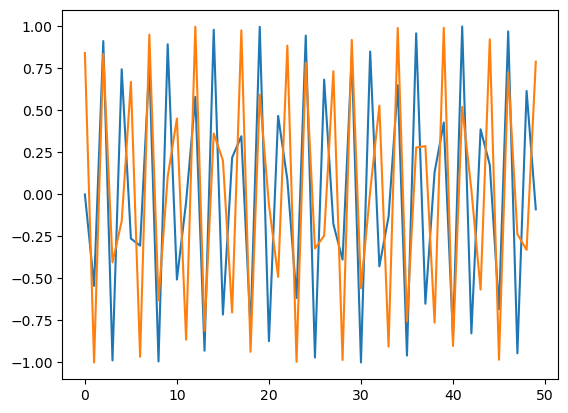

0

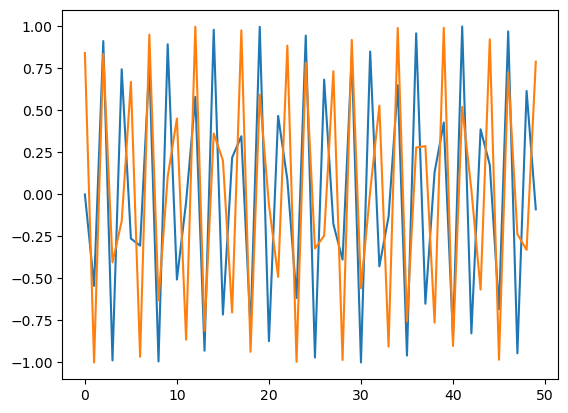

In [92]:
ind = 50
plt.plot(np.arange(ind),signal1[:ind])
plt.plot(np.arange(ind),signal2[:ind])

plt.show()
plt.plot(np.arange(ind),signal1[:ind])
plt.plot(np.arange(ind),np.roll(signal2,round(phase_diff*1/(10)))[:ind])
round(-phase_diff*1/(10))

In [104]:
np.round((3*20/(10)))

6.0

In [94]:
dots = np.array([np.dot(signal1,np.roll(signal2,i)) for i in range(1024)])

In [ ]:
plt.plot(t,signal1*np.roll(signal2,int(sample_rate/(2*np.pi*freq))))

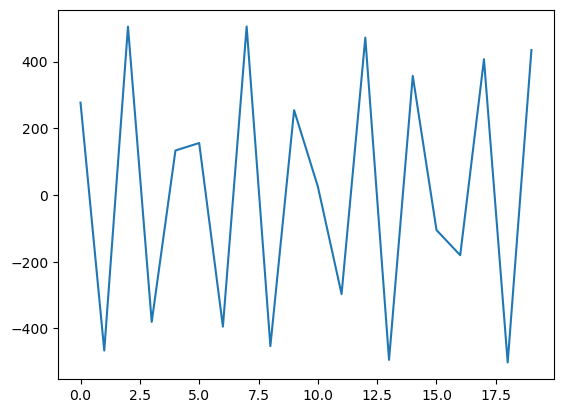

In [98]:
plt.plot(np.arange(20),dots[:20])

In [97]:
np.argmax(dots)

7

In [50]:
s1 = np.array ([0.000000 ,0.479426 ,0.841471 ,0.997495 ,0.909297 ,0.598472 ,0.141120 ,-0.350783 ,-0.756802 ,-0.977530 ,-0.958924 ,-0.705540 ,-0.279415 ,0.215120 ,0.656987 ,0.938000 ,0.989358 ,0.798487 ,0.412118 ,-0.075151 ,-0.544021 ,-0.879696 ,-0.999990 ,-0.875452 ,-0.536573 ,-0.066322 ,0.420167 ,0.803784 ,0.990607 ,0.934895 ,0.650288 ,0.206467 ,-0.287903 ,-0.711785 ,-0.961397 ,-0.975626 ,-0.750987 ,-0.342481 ,0.149877 ,0.605540 ,0.912945 ,0.996830 ,0.836656 ,0.471639 ,-0.008851 ,-0.487175 ,-0.846220 ,-0.998082 ,-0.905578 ,-0.591358 ,-0.132352 ,0.359058 ,0.762558 ,0.979358 ,0.956376 ,0.699240 ,0.270906 ,-0.223756 ,-0.663634 ,-0.941031 ,-0.988032 ,-0.793127 ,-0.404038 ,0.083974 ,0.551427 ,0.883870 ,0.999912 ,0.871140 ,0.529083 ,0.057487 ,-0.428183 ,-0.809019 ,-0.991779 ,-0.931717 ,-0.643538 ,-0.197799 ,0.296369 ,0.717975 ,0.963795 ,0.973645 ,0.745113 ,0.334151 ,-0.158623 ,-0.612560 ,-0.916522 ,-0.996087 ,-0.831775 ,-0.463816 ,0.017702 ,0.494885 ,0.850904 ,0.998591 ,0.901788 ,0.584197 ,0.123573 ,-0.367305 ,-0.768255 ,-0.981108 ,-0.953753 ,-0.692885 ,-0.262375 ,0.232374 ,0.670229 ,0.943989 ,0.986628 ,0.787705 ,0.395925 ,-0.092791 ,-0.558789 ,-0.887976 ,-0.999755 ,-0.866760 ,-0.521551 ,-0.048649 ,0.436165 ,0.814190 ,0.992873 ,0.928466 ,0.636738 ,0.189115 ,-0.304811 ,-0.724108 ,-0.966118 ,-0.971589 ,-0.739181 ,-0.325796 ,0.167356 ,0.619532 ,0.920026 ,0.995265 ,0.826829 ,0.455956 ,-0.026551 ,-0.502557 ,-0.855520 ,-0.999021 ,-0.897928 ,-0.576990 ,-0.114785 ,0.375524 ,0.773891 ,0.982782 ,0.951055 ,0.686476 ,0.253823 ,-0.240974 ,-0.676772 ,-0.946873 ,-0.985146 ,-0.782222 ,-0.387782 ,0.101601 ,0.566108 ,0.892012 ,0.999520 ,0.862311 ,0.513978 ,0.039806 ,-0.444113 ,-0.819297 ,-0.993889 ,-0.925142 ,-0.629888 ,-0.180416 ,0.313229 ,0.730184 ,0.968364 ,0.969456 ,0.733190 ,0.317414 ,-0.176076 ,-0.626456 ,-0.923458 ,-0.994366 ,-0.821818 ,-0.448060 ,0.035398 ,0.510190 ,0.860069 ,0.999374 ,0.893997 ,0.569738 ,0.105988 ,-0.383712 ,-0.779466 ,-0.984379 ,-0.948282 ,-0.680012 ,-0.245252 ,0.249555 ,0.683262 ,0.949682 ,0.983588 ,0.776676 ,0.379608 ,-0.110402 ,-0.573382 ,-0.895978 ,-0.999207 ,-0.857795 ,-0.506366 ,-0.030960 ,0.452026 ,0.824340 ,0.994827 ,0.921745 ,0.622989 ,0.171702 ,-0.321622 ,-0.736203 ,-0.970535 ,-0.967247 ,-0.727143 ,-0.309008 ,0.184782 ,0.633331 ,0.926819 ,0.993389 ,0.816743 ,0.440129 ,-0.044243 ,-0.517783 ,-0.864551 ,-0.999648 ,-0.889996 ,-0.562441 ,-0.097182 ,0.391871 ,0.784980 ,0.985899 ,0.945435 ,0.673496 ,0.236661 ,-0.258116 ,-0.689698 ,-0.952418 ,-0.981952 ,-0.771071 ,-0.371404 ,0.119195 ,0.580611 ,0.899873 ,0.998815 ,0.853212 ,0.498713 ,0.022112 ,-0.459903 ,-0.829318 ,-0.995687 ,-0.918277 ,-0.616040 ,-0.162976 ,0.329991 ,0.742164 ,0.972630 ,0.964962 ,0.721038 ,0.300578 ,-0.193473 ,-0.640156 ,-0.930106 ,-0.992334 ,-0.811603 ,-0.432164 ,0.053084 ,0.525335 ,0.868966 ,0.999844 ,0.885925 ,0.555101 ,0.088369 ,-0.399999 ,-0.790433 ,-0.987342 ,-0.942514 ,-0.666927 ,-0.228052 ,0.266657 ,0.696080 ,0.955078 ,0.980240 ,0.765404 ,0.363171 ,-0.127979 ,-0.587795 ,-0.903699 ,-0.998345 ,-0.848562 ,-0.491022 ,-0.013262 ,0.467745 ,0.834232 ,0.996469 ,0.914736 ,0.609044 ,0.154237 ,-0.338333 ,-0.748068 ,-0.974649 ,-0.962602 ,-0.714876 ,-0.292124 ,0.202150 ,0.646931 ,0.933321 ,0.991201 ,0.806401 ,0.424165 ,-0.061920 ,-0.532846 ,-0.873312 ,-0.999961 ,-0.881785 ,-0.547717 ,-0.079549 ,0.408096 ,0.795824 ,0.988707 ,0.939520 ,0.660305 ,0.219425 ,-0.275178 ,-0.702408 ,-0.957664 ,-0.978450 ,-0.759678 ,-0.354910 ,0.136752 ,0.594933 ,0.907453 ,0.997797 ,0.843846 ,0.483292 ,0.004411 ,-0.475550 ,-0.839080 ,-0.997173 ,-0.911124 ,-0.602000 ,-0.145485 ,0.346649 ,0.753912 ,0.976591 ,0.960166 ,0.708659 ,0.283648 ,-0.210811 ,-0.653655 ,-0.936462 ,-0.989990 ,-0.801135 ,-0.416133 ,0.070752 ,0.540315 ,0.877590 ,1.000000 ,0.877575 ,0.540290 ,0.070722 ,-0.416161 ,-0.801153 ,-0.989995 ,-0.936451 ,-0.653632 ,-0.210781 ,0.283677 ,0.708680 ,0.960174 ,0.976584 ,0.753892 ,0.346621 ,-0.145515 ,-0.602024 ,-0.911136 ,-0.997171 ,-0.839063 ,-0.475524 ,0.004441 ,0.483318 ,0.843862 ,0.997799 ,0.907440 ,0.594909 ,0.136722 ,-0.354938 ,-0.759698 ,-0.978457 ,-0.957655 ,-0.702386 ,-0.275149 ,0.219455 ,0.660328 ,0.939530 ,0.988702 ,0.795806 ,0.408068 ,-0.079579 ,-0.547742 ,-0.881799 ,-0.999961 ,-0.873297 ,-0.532820 ,-0.061890 ,0.424193 ,0.806418 ,0.991205 ,0.933310 ,0.646908 ,0.202120 ,-0.292153 ,-0.714898 ,-0.962610 ,-0.974642 ,-0.748048 ,-0.338305 ,0.154266 ,0.609068 ,0.914748 ,0.996467 ,0.834215 ,0.467719 ,-0.013292 ,-0.491048 ,-0.848578 ,-0.998347 ,-0.903686 ,-0.587771 ,-0.127949 ,0.363199 ,0.765424 ,0.980246 ,0.955069 ,0.696058 ,0.266628 ,-0.228082 ,-0.666949 ,-0.942525 ,-0.987337 ,-0.790415 ,-0.399972 ,0.088399 ,0.555126 ,0.885939 ,0.999843 ,0.868951 ,0.525309 ,0.053053 ,-0.432192 ,-0.811621 ,-0.992337 ,-0.930095 ,-0.640133 ,-0.193444 ,0.300607 ,0.721059 ,0.964970 ,0.972623 ,0.742144 ,0.329962 ,-0.163006 ,-0.616064 ,-0.918289 ,-0.995684 ,-0.829301 ,-0.459877 ,0.022142 ,0.498739 ,0.853228 ,0.998817 ,0.899860 ,0.580587 ,0.119165 ,-0.371432 ,-0.771090 ,-0.981958 ,-0.952408 ,-0.689676 ,-0.258087 ,0.236691 ,0.673518 ,0.945445 ,0.985894 ,0.784962 ,0.391843 ,-0.097212 ,-0.562466 ,-0.890009 ,-0.999647 ,-0.864536 ,-0.517757 ,-0.044213 ,0.440157 ,0.816760 ,0.993392 ,0.926807 ,0.633308 ,0.184752 ,-0.309037 ,-0.727163 ,-0.967254 ,-0.970528 ,-0.736183 ,-0.321594 ,0.171732 ,0.623012 ,0.921757 ,0.994824 ,0.824323 ,0.451999 ,-0.030990 ,-0.506392 ,-0.857811 ,-0.999208 ,-0.895964 ,-0.573357 ,-0.110372 ,0.379636 ,0.776695 ,0.983593 ,0.949673 ,0.683240 ,0.249526 ,-0.245281 ,-0.680035 ,-0.948292 ,-0.984374 ,-0.779447 ,-0.383685 ,0.106017 ,0.569763 ,0.894010 ,0.999373 ,0.860054 ,0.510164 ,0.035368 ,-0.448087 ,-0.821835 ,-0.994369 ,-0.923447 ,-0.626433 ,-0.176046 ,0.317443 ,0.733211 ,0.969463 ,0.968357 ,0.730163 ,0.313200 ,-0.180445 ,-0.629911 ,-0.925153 ,-0.993885 ,-0.819280 ,-0.444086 ,0.039836 ,0.514004 ,0.862327 ,0.999521 ,0.891998 ,0.566083 ,0.101571 ,-0.387809 ,-0.782240 ,-0.985151 ,-0.946863 ,-0.676750 ,-0.240944 ,0.253853 ,0.686498 ,0.951064 ,0.982777 ,0.773872 ,0.375496 ,-0.114815 ,-0.577014 ,-0.897941 ,-0.999020 ,-0.855504 ,-0.502531 ,-0.026521 ,0.455983 ,0.826846 ,0.995268 ,0.920014 ,0.619509 ,0.167326 ,-0.325824 ,-0.739201 ,-0.971596 ,-0.966110 ,-0.724087 ,-0.304782 ,0.189144 ,0.636761 ,0.928477 ,0.992869 ,0.814172 ,0.436138 ,-0.048679 ,-0.521577 ,-0.866775 ,-0.999756 ,-0.887962 ,-0.558764 ,-0.092761 ,0.395953 ,0.787724 ,0.986633 ,0.943979 ,0.670207 ,0.232344 ,-0.262404 ,-0.692907 ,-0.953762 ,-0.981103 ,-0.768235 ,-0.367277 ,0.123603 ,0.584221 ,0.901801 ,0.998589 ,0.850888 ,0.494859 ,0.017672 ,-0.463842 ,-0.831791 ,-0.996089 ,-0.916509 ,-0.612536 ,-0.158593 ,0.334180 ,0.745133 ,0.973652 ,0.963787 ,0.717954 ,0.296340 ,-0.197828 ,-0.643561 ,-0.931728 ,-0.991775 ,-0.809001 ,-0.428155 ,0.057518 ,0.529108 ,0.871155 ,0.999912 ,0.883856 ,0.551402 ,0.083944 ,-0.404065 ,-0.793146 ,-0.988036 ,-0.941021 ,-0.663611 ,-0.223726 ,0.270935 ,0.699262 ,0.956385 ,0.979352 ,0.762539 ,0.359030 ,-0.132382 ,-0.591382 ,-0.905591 ,-0.998080 ,-0.846204 ,-0.487148 ,-0.008821 ,0.471666 ,0.836672 ,0.996832 ,0.912933 ,0.605516 ,0.149847 ,-0.342509 ,-0.751007 ,-0.975633 ,-0.961389 ,-0.711764 ,-0.287874 ,0.206497 ,0.650311 ,0.934906 ,0.990603 ,0.803766 ,0.420140 ,-0.066352 ,-0.536598 ,-0.875467 ,-0.999990 ,-0.879681 ,-0.543996 ,-0.075121 ,0.412146 ,0.798505 ,0.989363 ,0.937990 ,0.656964 ,0.215091 ,-0.279444 ,-0.705562 ,-0.958933 ,-0.977524 ,-0.756783 ,-0.350755 ,0.141150 ,0.598496 ,0.909310 ,0.997493 ,0.841455 ,0.479399 ,-0.000030 ,-0.479452 ,-0.841487 ,-0.997497 ,-0.909285 ,-0.598448 ,-0.141090 ,0.350811 ,0.756822 ,0.977536 ,0.958916 ,0.705519 ,0.279387 ,-0.215149 ,-0.657009 ,-0.938010 ,-0.989354 ,-0.798469 ,-0.412091 ,0.075181 ,0.544046 ,0.879710 ,0.999990 ,0.875438 ,0.536547 ,0.066292 ,-0.420194 ,-0.803802 ,-0.990611 ,-0.934884 ,-0.650265 ,-0.206438 ,0.287932 ,0.711807 ,0.961406 ,0.975619 ,0.750967 ,0.342452 ,-0.149907 ,-0.605564 ,-0.912958 ,-0.996827 ,-0.836639 ,-0.471612 ,0.008881 ,0.487201 ,0.846236 ,0.998084 ,0.905566 ,0.591333 ,0.132322 ,-0.359086 ,-0.762578 ,-0.979364 ,-0.956367 ,-0.699218 ,-0.270877 ,0.223785 ,0.663656 ,0.941042 ,0.988027 ,0.793109 ,0.404010 ,-0.084004 ,-0.551452 ,-0.883885 ,-0.999911 ,-0.871125 ,-0.529057 ,-0.057457 ,0.428210 ,0.809036 ,0.991783 ,0.931706 ,0.643515 ,0.197769 ,-0.296397 ,-0.717996 ,-0.963803 ,-0.973639 ,-0.745093 ,-0.334123 ,0.158652 ,0.612584 ,0.916534 ,0.996084 ,0.831758 ,0.463789 ,-0.017732 ,-0.494912 ,-0.850919 ,-0.998592 ,-0.901775 ,-0.584172 ,-0.123543 ,0.367333 ,0.768274 ,0.981114 ,0.953744 ,0.692863 ,0.262346 ,-0.232403 ,-0.670252 ,-0.943999 ,-0.986623 ,-0.787687 ,-0.395897 ,0.092821 ,0.558814 ,0.887990 ,0.999755 ,0.866745 ,0.521525 ,0.048618 ,-0.436192 ,-0.814207 ,-0.992876 ,-0.928455 ,-0.636715 ,-0.189085 ,0.304839 ,0.724128 ,0.966126 ,0.971581 ,0.739160 ,0.325767 ,-0.167385 ,-0.619556 ,-0.920038 ,-0.995262 ,-0.826812 ,-0.455929 ,0.026581 ,0.502583 ,0.855536 ,0.999023 ,0.897914 ,0.576965 ,0.114755 ,-0.375552 ,-0.773910 ,-0.982788 ,-0.951045 ,-0.686454 ,-0.253794 ,0.241003 ,0.676794 ,0.946883 ,0.985141 ,0.782203 ,0.387754 ,-0.101631 ,-0.566132 ,-0.892025 ,-0.999519 ,-0.862296 ,-0.513953 ,-0.039776 ,0.444140 ,0.819314 ,0.993892 ,0.925130 ,0.629865 ,0.180386 ,-0.313257 ,-0.730204 ,-0.968372 ,-0.969448 ,-0.733170 ,-0.317386 ,0.176105 ,0.626480 ,0.923470 ,0.994363 ,0.821801 ,0.448033 ,-0.035428 ,-0.510216 ,-0.860085 ,-0.999375 ,-0.893983 ,-0.569713 ,-0.105958 ,0.383740 ,0.779485 ,0.984385 ,0.948273 ,0.679990 ,0.245223 ,-0.249584 ,-0.683284 ,-0.949692 ,-0.983582 ,-0.776657 ,-0.379580 ,0.110432 ,0.573407 ,0.895991 ,0.999206 ,0.857780 ,0.506340 ,0.030930 ,-0.452053 ,-0.824357 ,-0.994830 ,-0.921734 ,-0.622965 ,-0.171673 ,0.321651 ,0.736223 ,0.970543 ,0.967239 ,0.727122 ,0.308980 ,-0.184811 ,-0.633354 ,-0.926830 ,-0.993385 ,-0.816725 ,-0.440102 ,0.044273 ,0.517808 ,0.864567 ,0.999649 ,0.889982 ,0.562416 ,0.097152 ,-0.391899 ,-0.784999 ,-0.985904 ,-0.945426 ,-0.673474 ,-0.236632 ,0.258145 ,0.689720 ,0.952427 ,0.981946 ,0.771051 ,0.371376 ,-0.119225 ,-0.580636 ,-0.899887 ,-0.998814 ,-0.853197 ,-0.498687 ,-0.022082 ,0.459930 ,0.829335 ,0.995690 ,0.918265 ,0.616017 ,0.162946 ,-0.330019 ,-0.742185 ,-0.972637 ,-0.964954 ,-0.721017 ,-0.300549 ,0.193503 ,0.640179 ,0.930117 ,0.992330 ,0.811586 ,0.432137 ,-0.053114 ,-0.525360 ,-0.868981 ,-0.999844 ,-0.885911 ,-0.555076 ,-0.088339 ,0.400027 ,0.790452 ,0.987346 ,0.942504 ,0.666904 ,0.228023 ,-0.266687 ,-0.696102 ,-0.955087 ,-0.980234 ,-0.765385 ,-0.363143 ,0.128009 ,0.587819 ,0.903712 ,0.998344 ,0.848546 ,0.490995 ,0.013232 ,-0.467772 ,-0.834248 ,-0.996472 ,-0.914724 ,-0.609020 ,-0.154207 ,0.338362 ,0.748088 ,0.974655 ,0.962594 ,0.714855 ,0.292096 ,-0.202179 ,-0.646954 ,-0.933331 ,-0.991197 ,-0.806383 ,-0.424138 ,0.061950 ,0.532871 ,0.873327 ,0.999961 ,0.881770 ,0.547691 ])
s2 = np.array ([0.841471 ,0.997495 ,0.909297 ,0.598472 ,0.141120 ,-0.350783 ,-0.756802 ,-0.977530 ,-0.958924 ,-0.705540 ,-0.279415 ,0.215120 ,0.656987 ,0.938000 ,0.989358 ,0.798487 ,0.412118 ,-0.075151 ,-0.544021 ,-0.879696 ,-0.999990 ,-0.875452 ,-0.536573 ,-0.066322 ,0.420167 ,0.803784 ,0.990607 ,0.934895 ,0.650288 ,0.206467 ,-0.287903 ,-0.711785 ,-0.961397 ,-0.975626 ,-0.750987 ,-0.342481 ,0.149877 ,0.605540 ,0.912945 ,0.996830 ,0.836656 ,0.471639 ,-0.008851 ,-0.487175 ,-0.846220 ,-0.998082 ,-0.905578 ,-0.591358 ,-0.132352 ,0.359058 ,0.762558 ,0.979358 ,0.956376 ,0.699240 ,0.270906 ,-0.223756 ,-0.663634 ,-0.941031 ,-0.988032 ,-0.793127 ,-0.404038 ,0.083974 ,0.551427 ,0.883870 ,0.999912 ,0.871140 ,0.529083 ,0.057487 ,-0.428183 ,-0.809019 ,-0.991779 ,-0.931717 ,-0.643538 ,-0.197799 ,0.296369 ,0.717975 ,0.963795 ,0.973645 ,0.745113 ,0.334151 ,-0.158623 ,-0.612560 ,-0.916522 ,-0.996087 ,-0.831775 ,-0.463816 ,0.017702 ,0.494885 ,0.850904 ,0.998591 ,0.901788 ,0.584197 ,0.123573 ,-0.367305 ,-0.768255 ,-0.981108 ,-0.953753 ,-0.692885 ,-0.262375 ,0.232374 ,0.670229 ,0.943989 ,0.986628 ,0.787705 ,0.395925 ,-0.092791 ,-0.558789 ,-0.887976 ,-0.999755 ,-0.866760 ,-0.521551 ,-0.048649 ,0.436165 ,0.814190 ,0.992873 ,0.928466 ,0.636738 ,0.189115 ,-0.304811 ,-0.724108 ,-0.966118 ,-0.971589 ,-0.739181 ,-0.325796 ,0.167356 ,0.619532 ,0.920026 ,0.995265 ,0.826829 ,0.455956 ,-0.026551 ,-0.502557 ,-0.855520 ,-0.999021 ,-0.897928 ,-0.576990 ,-0.114785 ,0.375524 ,0.773891 ,0.982782 ,0.951055 ,0.686476 ,0.253823 ,-0.240974 ,-0.676772 ,-0.946873 ,-0.985146 ,-0.782222 ,-0.387782 ,0.101601 ,0.566108 ,0.892012 ,0.999520 ,0.862311 ,0.513978 ,0.039806 ,-0.444113 ,-0.819297 ,-0.993889 ,-0.925142 ,-0.629888 ,-0.180416 ,0.313229 ,0.730184 ,0.968364 ,0.969456 ,0.733190 ,0.317414 ,-0.176076 ,-0.626456 ,-0.923458 ,-0.994366 ,-0.821818 ,-0.448060 ,0.035398 ,0.510190 ,0.860069 ,0.999374 ,0.893997 ,0.569738 ,0.105988 ,-0.383712 ,-0.779466 ,-0.984379 ,-0.948282 ,-0.680012 ,-0.245252 ,0.249555 ,0.683262 ,0.949682 ,0.983588 ,0.776676 ,0.379608 ,-0.110402 ,-0.573382 ,-0.895978 ,-0.999207 ,-0.857795 ,-0.506366 ,-0.030960 ,0.452026 ,0.824340 ,0.994827 ,0.921745 ,0.622989 ,0.171702 ,-0.321622 ,-0.736203 ,-0.970535 ,-0.967247 ,-0.727143 ,-0.309008 ,0.184782 ,0.633331 ,0.926819 ,0.993389 ,0.816743 ,0.440129 ,-0.044243 ,-0.517783 ,-0.864551 ,-0.999648 ,-0.889996 ,-0.562441 ,-0.097182 ,0.391871 ,0.784980 ,0.985899 ,0.945435 ,0.673496 ,0.236661 ,-0.258116 ,-0.689698 ,-0.952418 ,-0.981952 ,-0.771071 ,-0.371404 ,0.119195 ,0.580611 ,0.899873 ,0.998815 ,0.853212 ,0.498713 ,0.022112 ,-0.459903 ,-0.829318 ,-0.995687 ,-0.918277 ,-0.616040 ,-0.162976 ,0.329991 ,0.742164 ,0.972630 ,0.964962 ,0.721038 ,0.300578 ,-0.193473 ,-0.640156 ,-0.930106 ,-0.992334 ,-0.811603 ,-0.432164 ,0.053084 ,0.525335 ,0.868966 ,0.999844 ,0.885925 ,0.555101 ,0.088369 ,-0.399999 ,-0.790433 ,-0.987342 ,-0.942514 ,-0.666927 ,-0.228052 ,0.266657 ,0.696080 ,0.955078 ,0.980240 ,0.765404 ,0.363171 ,-0.127979 ,-0.587795 ,-0.903699 ,-0.998345 ,-0.848562 ,-0.491022 ,-0.013262 ,0.467745 ,0.834232 ,0.996469 ,0.914736 ,0.609044 ,0.154237 ,-0.338333 ,-0.748068 ,-0.974649 ,-0.962602 ,-0.714876 ,-0.292124 ,0.202150 ,0.646931 ,0.933321 ,0.991201 ,0.806401 ,0.424165 ,-0.061920 ,-0.532846 ,-0.873312 ,-0.999961 ,-0.881785 ,-0.547717 ,-0.079549 ,0.408096 ,0.795824 ,0.988707 ,0.939520 ,0.660305 ,0.219425 ,-0.275178 ,-0.702408 ,-0.957664 ,-0.978450 ,-0.759678 ,-0.354910 ,0.136752 ,0.594933 ,0.907453 ,0.997797 ,0.843846 ,0.483292 ,0.004411 ,-0.475550 ,-0.839080 ,-0.997173 ,-0.911124 ,-0.602000 ,-0.145485 ,0.346649 ,0.753912 ,0.976591 ,0.960166 ,0.708659 ,0.283648 ,-0.210811 ,-0.653655 ,-0.936462 ,-0.989990 ,-0.801135 ,-0.416133 ,0.070752 ,0.540315 ,0.877590 ,1.000000 ,0.877575 ,0.540290 ,0.070722 ,-0.416161 ,-0.801153 ,-0.989995 ,-0.936451 ,-0.653632 ,-0.210781 ,0.283677 ,0.708680 ,0.960174 ,0.976584 ,0.753892 ,0.346621 ,-0.145515 ,-0.602024 ,-0.911136 ,-0.997171 ,-0.839063 ,-0.475524 ,0.004441 ,0.483318 ,0.843862 ,0.997799 ,0.907440 ,0.594909 ,0.136722 ,-0.354938 ,-0.759698 ,-0.978457 ,-0.957655 ,-0.702386 ,-0.275149 ,0.219455 ,0.660328 ,0.939530 ,0.988702 ,0.795806 ,0.408068 ,-0.079579 ,-0.547742 ,-0.881799 ,-0.999961 ,-0.873297 ,-0.532820 ,-0.061890 ,0.424193 ,0.806418 ,0.991205 ,0.933310 ,0.646908 ,0.202120 ,-0.292153 ,-0.714898 ,-0.962610 ,-0.974642 ,-0.748048 ,-0.338305 ,0.154266 ,0.609068 ,0.914748 ,0.996467 ,0.834215 ,0.467719 ,-0.013292 ,-0.491048 ,-0.848578 ,-0.998347 ,-0.903686 ,-0.587771 ,-0.127949 ,0.363199 ,0.765424 ,0.980246 ,0.955069 ,0.696058 ,0.266628 ,-0.228082 ,-0.666949 ,-0.942525 ,-0.987337 ,-0.790415 ,-0.399972 ,0.088399 ,0.555126 ,0.885939 ,0.999843 ,0.868951 ,0.525309 ,0.053053 ,-0.432192 ,-0.811621 ,-0.992337 ,-0.930095 ,-0.640133 ,-0.193444 ,0.300607 ,0.721059 ,0.964970 ,0.972623 ,0.742144 ,0.329962 ,-0.163006 ,-0.616064 ,-0.918289 ,-0.995684 ,-0.829301 ,-0.459877 ,0.022142 ,0.498739 ,0.853228 ,0.998817 ,0.899860 ,0.580587 ,0.119165 ,-0.371432 ,-0.771090 ,-0.981958 ,-0.952408 ,-0.689676 ,-0.258087 ,0.236691 ,0.673518 ,0.945445 ,0.985894 ,0.784962 ,0.391843 ,-0.097212 ,-0.562466 ,-0.890009 ,-0.999647 ,-0.864536 ,-0.517757 ,-0.044213 ,0.440157 ,0.816760 ,0.993392 ,0.926807 ,0.633308 ,0.184752 ,-0.309037 ,-0.727163 ,-0.967254 ,-0.970528 ,-0.736183 ,-0.321594 ,0.171732 ,0.623012 ,0.921757 ,0.994824 ,0.824323 ,0.451999 ,-0.030990 ,-0.506392 ,-0.857811 ,-0.999208 ,-0.895964 ,-0.573357 ,-0.110372 ,0.379636 ,0.776695 ,0.983593 ,0.949673 ,0.683240 ,0.249526 ,-0.245281 ,-0.680035 ,-0.948292 ,-0.984374 ,-0.779447 ,-0.383685 ,0.106017 ,0.569763 ,0.894010 ,0.999373 ,0.860054 ,0.510164 ,0.035368 ,-0.448087 ,-0.821835 ,-0.994369 ,-0.923447 ,-0.626433 ,-0.176046 ,0.317443 ,0.733211 ,0.969463 ,0.968357 ,0.730163 ,0.313200 ,-0.180445 ,-0.629911 ,-0.925153 ,-0.993885 ,-0.819280 ,-0.444086 ,0.039836 ,0.514004 ,0.862327 ,0.999521 ,0.891998 ,0.566083 ,0.101571 ,-0.387809 ,-0.782240 ,-0.985151 ,-0.946863 ,-0.676750 ,-0.240944 ,0.253853 ,0.686498 ,0.951064 ,0.982777 ,0.773872 ,0.375496 ,-0.114815 ,-0.577014 ,-0.897941 ,-0.999020 ,-0.855504 ,-0.502531 ,-0.026521 ,0.455983 ,0.826846 ,0.995268 ,0.920014 ,0.619509 ,0.167326 ,-0.325824 ,-0.739201 ,-0.971596 ,-0.966110 ,-0.724087 ,-0.304782 ,0.189144 ,0.636761 ,0.928477 ,0.992869 ,0.814172 ,0.436138 ,-0.048679 ,-0.521577 ,-0.866775 ,-0.999756 ,-0.887962 ,-0.558764 ,-0.092761 ,0.395953 ,0.787724 ,0.986633 ,0.943979 ,0.670207 ,0.232344 ,-0.262404 ,-0.692907 ,-0.953762 ,-0.981103 ,-0.768235 ,-0.367277 ,0.123603 ,0.584221 ,0.901801 ,0.998589 ,0.850888 ,0.494859 ,0.017672 ,-0.463842 ,-0.831791 ,-0.996089 ,-0.916509 ,-0.612536 ,-0.158593 ,0.334180 ,0.745133 ,0.973652 ,0.963787 ,0.717954 ,0.296340 ,-0.197828 ,-0.643561 ,-0.931728 ,-0.991775 ,-0.809001 ,-0.428155 ,0.057518 ,0.529108 ,0.871155 ,0.999912 ,0.883856 ,0.551402 ,0.083944 ,-0.404065 ,-0.793146 ,-0.988036 ,-0.941021 ,-0.663611 ,-0.223726 ,0.270935 ,0.699262 ,0.956385 ,0.979352 ,0.762539 ,0.359030 ,-0.132382 ,-0.591382 ,-0.905591 ,-0.998080 ,-0.846204 ,-0.487148 ,-0.008821 ,0.471666 ,0.836672 ,0.996832 ,0.912933 ,0.605516 ,0.149847 ,-0.342509 ,-0.751007 ,-0.975633 ,-0.961389 ,-0.711764 ,-0.287874 ,0.206497 ,0.650311 ,0.934906 ,0.990603 ,0.803766 ,0.420140 ,-0.066352 ,-0.536598 ,-0.875467 ,-0.999990 ,-0.879681 ,-0.543996 ,-0.075121 ,0.412146 ,0.798505 ,0.989363 ,0.937990 ,0.656964 ,0.215091 ,-0.279444 ,-0.705562 ,-0.958933 ,-0.977524 ,-0.756783 ,-0.350755 ,0.141150 ,0.598496 ,0.909310 ,0.997493 ,0.841455 ,0.479399 ,-0.000030 ,-0.479452 ,-0.841487 ,-0.997497 ,-0.909285 ,-0.598448 ,-0.141090 ,0.350811 ,0.756822 ,0.977536 ,0.958916 ,0.705519 ,0.279387 ,-0.215149 ,-0.657009 ,-0.938010 ,-0.989354 ,-0.798469 ,-0.412091 ,0.075181 ,0.544046 ,0.879710 ,0.999990 ,0.875438 ,0.536547 ,0.066292 ,-0.420194 ,-0.803802 ,-0.990611 ,-0.934884 ,-0.650265 ,-0.206438 ,0.287932 ,0.711807 ,0.961406 ,0.975619 ,0.750967 ,0.342452 ,-0.149907 ,-0.605564 ,-0.912958 ,-0.996827 ,-0.836639 ,-0.471612 ,0.008881 ,0.487201 ,0.846236 ,0.998084 ,0.905566 ,0.591333 ,0.132322 ,-0.359086 ,-0.762578 ,-0.979364 ,-0.956367 ,-0.699218 ,-0.270877 ,0.223785 ,0.663656 ,0.941042 ,0.988027 ,0.793109 ,0.404010 ,-0.084004 ,-0.551452 ,-0.883885 ,-0.999911 ,-0.871125 ,-0.529057 ,-0.057457 ,0.428210 ,0.809036 ,0.991783 ,0.931706 ,0.643515 ,0.197769 ,-0.296397 ,-0.717996 ,-0.963803 ,-0.973639 ,-0.745093 ,-0.334123 ,0.158652 ,0.612584 ,0.916534 ,0.996084 ,0.831758 ,0.463789 ,-0.017732 ,-0.494912 ,-0.850919 ,-0.998592 ,-0.901775 ,-0.584172 ,-0.123543 ,0.367333 ,0.768274 ,0.981114 ,0.953744 ,0.692863 ,0.262346 ,-0.232403 ,-0.670252 ,-0.943999 ,-0.986623 ,-0.787687 ,-0.395897 ,0.092821 ,0.558814 ,0.887990 ,0.999755 ,0.866745 ,0.521525 ,0.048618 ,-0.436192 ,-0.814207 ,-0.992876 ,-0.928455 ,-0.636715 ,-0.189085 ,0.304839 ,0.724128 ,0.966126 ,0.971581 ,0.739160 ,0.325767 ,-0.167385 ,-0.619556 ,-0.920038 ,-0.995262 ,-0.826812 ,-0.455929 ,0.026581 ,0.502583 ,0.855536 ,0.999023 ,0.897914 ,0.576965 ,0.114755 ,-0.375552 ,-0.773910 ,-0.982788 ,-0.951045 ,-0.686454 ,-0.253794 ,0.241003 ,0.676794 ,0.946883 ,0.985141 ,0.782203 ,0.387754 ,-0.101631 ,-0.566132 ,-0.892025 ,-0.999519 ,-0.862296 ,-0.513953 ,-0.039776 ,0.444140 ,0.819314 ,0.993892 ,0.925130 ,0.629865 ,0.180386 ,-0.313257 ,-0.730204 ,-0.968372 ,-0.969448 ,-0.733170 ,-0.317386 ,0.176105 ,0.626480 ,0.923470 ,0.994363 ,0.821801 ,0.448033 ,-0.035428 ,-0.510216 ,-0.860085 ,-0.999375 ,-0.893983 ,-0.569713 ,-0.105958 ,0.383740 ,0.779485 ,0.984385 ,0.948273 ,0.679990 ,0.245223 ,-0.249584 ,-0.683284 ,-0.949692 ,-0.983582 ,-0.776657 ,-0.379580 ,0.110432 ,0.573407 ,0.895991 ,0.999206 ,0.857780 ,0.506340 ,0.030930 ,-0.452053 ,-0.824357 ,-0.994830 ,-0.921734 ,-0.622965 ,-0.171673 ,0.321651 ,0.736223 ,0.970543 ,0.967239 ,0.727122 ,0.308980 ,-0.184811 ,-0.633354 ,-0.926830 ,-0.993385 ,-0.816725 ,-0.440102 ,0.044273 ,0.517808 ,0.864567 ,0.999649 ,0.889982 ,0.562416 ,0.097152 ,-0.391899 ,-0.784999 ,-0.985904 ,-0.945426 ,-0.673474 ,-0.236632 ,0.258145 ,0.689720 ,0.952427 ,0.981946 ,0.771051 ,0.371376 ,-0.119225 ,-0.580636 ,-0.899887 ,-0.998814 ,-0.853197 ,-0.498687 ,-0.022082 ,0.459930 ,0.829335 ,0.995690 ,0.918265 ,0.616017 ,0.162946 ,-0.330019 ,-0.742185 ,-0.972637 ,-0.964954 ,-0.721017 ,-0.300549 ,0.193503 ,0.640179 ,0.930117 ,0.992330 ,0.811586 ,0.432137 ,-0.053114 ,-0.525360 ,-0.868981 ,-0.999844 ,-0.885911 ,-0.555076 ,-0.088339 ,0.400027 ,0.790452 ,0.987346 ,0.942504 ,0.666904 ,0.228023 ,-0.266687 ,-0.696102 ,-0.955087 ,-0.980234 ,-0.765385 ,-0.363143 ,0.128009 ,0.587819 ,0.903712 ,0.998344 ,0.848546 ,0.490995 ,0.013232 ,-0.467772 ,-0.834248 ,-0.996472 ,-0.914724 ,-0.609020 ,-0.154207 ,0.338362 ,0.748088 ,0.974655 ,0.962594 ,0.714855 ,0.292096 ,-0.202179 ,-0.646954 ,-0.933331 ,-0.991197 ,-0.806383 ,-0.424138 ,0.061950 ,0.532871 ,0.873327 ,0.999961 ,0.881770 ,0.547691 ,0.079518 ,-0.408123 ])


In [51]:
analytic_signal1 = hilbert(s1)
analytic_signal2 = hilbert(s2)

phase1 = np.unwrap(np.angle(analytic_signal1))
phase2 = np.unwrap(np.angle(analytic_signal2))

phase_diff = np.mean(phase1 - phase2)
phase_diff

-0.997934880600106

In [71]:
samp_rate = 20 
freq = 2*np.pi*np.fft.fftfreq(1024)[np.argmax(np.fft.fft(s1))] * 20 
freq

9.940195505498954

In [70]:
phase_diff * 20 / 

-1.9958697612002119

In [61]:
data= np.zeros(1024)
for i in range(1024):
    data[i] = np.dot(np.roll(s1,i),s2)

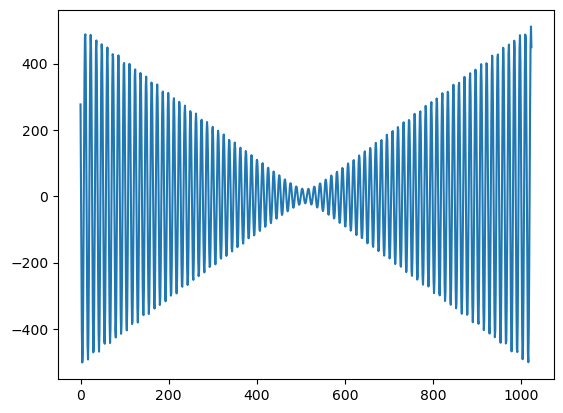

In [63]:
plt.plot(np.arange(1024),data)

In [69]:
np.argmax(data)

1022